# Nutritional Facts for most common foods
Source: https://www.kaggle.com/datasets/niharika41298/nutrition-details-for-most-common-foods  
(this is the larger dataset)

### Possible scenario ??:  
- A nutritionist creates custom diet plans for clients with medically-necessary dietary needs and wellness goals
- They want to be able to break down prescribed diets by the meal and the recipe, and to have the ability to specify calories, macro and micronutrients, and vitamins/minerals
- We have met with the client and obtained the following dataset detailing this information for an array of pre-defined meals. The nutritionist would like to be able to input their client's nutrition requirements and discover which meals to offer the client.  
- This input contains several parts:  
1. what the client likes and doesn't like to eat  
2. the nutritionist's breakdown specifying the client's prescription for that meal. 

- The returned result will be the meals which fit the client's taste and nutritional needs.  
- We will first study and organize the dataset to pick up on patterns across the food types  
- Then we can create a hypothetical plan for the best way for the end user (the nutritionist) to access and manipulate the data. Like a program, database, etc.  
- Further, we could see if the nutritionist's meal options are sufficient by examinig how many options are available for different dietary needs  

### Questions
1. What 

### Data Acquisition

preview of `nutrition.csv`:

In [1]:
import pandas as pd
# create dataframe
nutrition = pd.read_csv("nutrition.csv")
# display a preview
nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [2]:
# print the number of cols, rows
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(nutrition.shape[1]) + " columns and " + str(nutrition.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 77 columns and 8789 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [3]:
# basic statistics for the numerical columns
nutrition.describe()

,Unnamed: 0,calories,lucopene
count,8789.000000,8789.000000,8789.0
mean,4394.000000,226.283878,0.0
std,2537.310091,169.862001,0.0
min,0.000000,0.000000,0.0
25%,2197.000000,91.000000,0.0
50%,4394.000000,191.000000,0.0
75%,6591.000000,337.000000,0.0
max,8788.000000,902.000000,0.0


In [4]:
# show the data types
nutrition.dtypes

Unnamed: 0       int64
name            object
serving_size    object
calories         int64
total_fat       object
                 ...  
alcohol         object
ash             object
caffeine        object
theobromine     object
water           object
Length: 77, dtype: object

In [5]:
# print all the column names
nutrition.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

#### unique values

In [6]:
# display the number of unique values in each categorical column
object_columns = nutrition.select_dtypes(include=['object']).columns  # set up a list of only the `object` dtypes

for column in object_columns:  # iterate thru columns list
    unique_count = nutrition[column].nunique()  # count how many unique values are present 
    print(f"There are {unique_count} different values in `{column}`.")  # print the number in the specified format

There are 8789 different values in `name`.
There are 1 different values in `serving_size`.
There are 176 different values in `total_fat`.
There are 156 different values in `saturated_fat`.
There are 313 different values in `cholesterol`.
There are 1245 different values in `sodium`.
There are 1197 different values in `choline`.
There are 374 different values in `folate`.
There are 259 different values in `folic_acid`.
There are 3818 different values in `niacin`.
There are 1479 different values in `pantothenic_acid`.
There are 838 different values in `riboflavin`.
There are 914 different values in `thiamin`.
There are 1341 different values in `vitamin_a`.
There are 566 different values in `vitamin_a_rae`.
There are 215 different values in `carotene_alpha`.
There are 582 different values in `carotene_beta`.
There are 144 different values in `cryptoxanthin_beta`.
There are 541 different values in `lutein_zeaxanthin`.
There are 694 different values in `vitamin_b12`.
There are 988 different 

#### missing values
18% of the `saturated_fat` column is missing.

In [7]:
# check for missing values
missing_values = nutrition.isnull().sum()

# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])

# calculate the percentage of missing values for each column
missing_pct = ((missing_values / nutrition.shape[0] * 100).round(3))
# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct

# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

,Count Missing,% Missing
saturated_fat,1590,18.091


looks like there are a lot of entries where `total_fat` equals zero and `saturated_fat` is NaN. we can at least fill these values of `saturated_fat` with zero. We will do that after converting everything from strings to numerical values later on.  

In [8]:
nutrition.query("total_fat == 0")

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water


In [9]:
# check for missing values
missing_values = nutrition.isnull().sum()

# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])

# calculate the percentage of missing values for each column
missing_pct = ((missing_values / nutrition.shape[0] * 100).round(3))
# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct

# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

,Count Missing,% Missing
saturated_fat,1590,18.091


<Axes: >

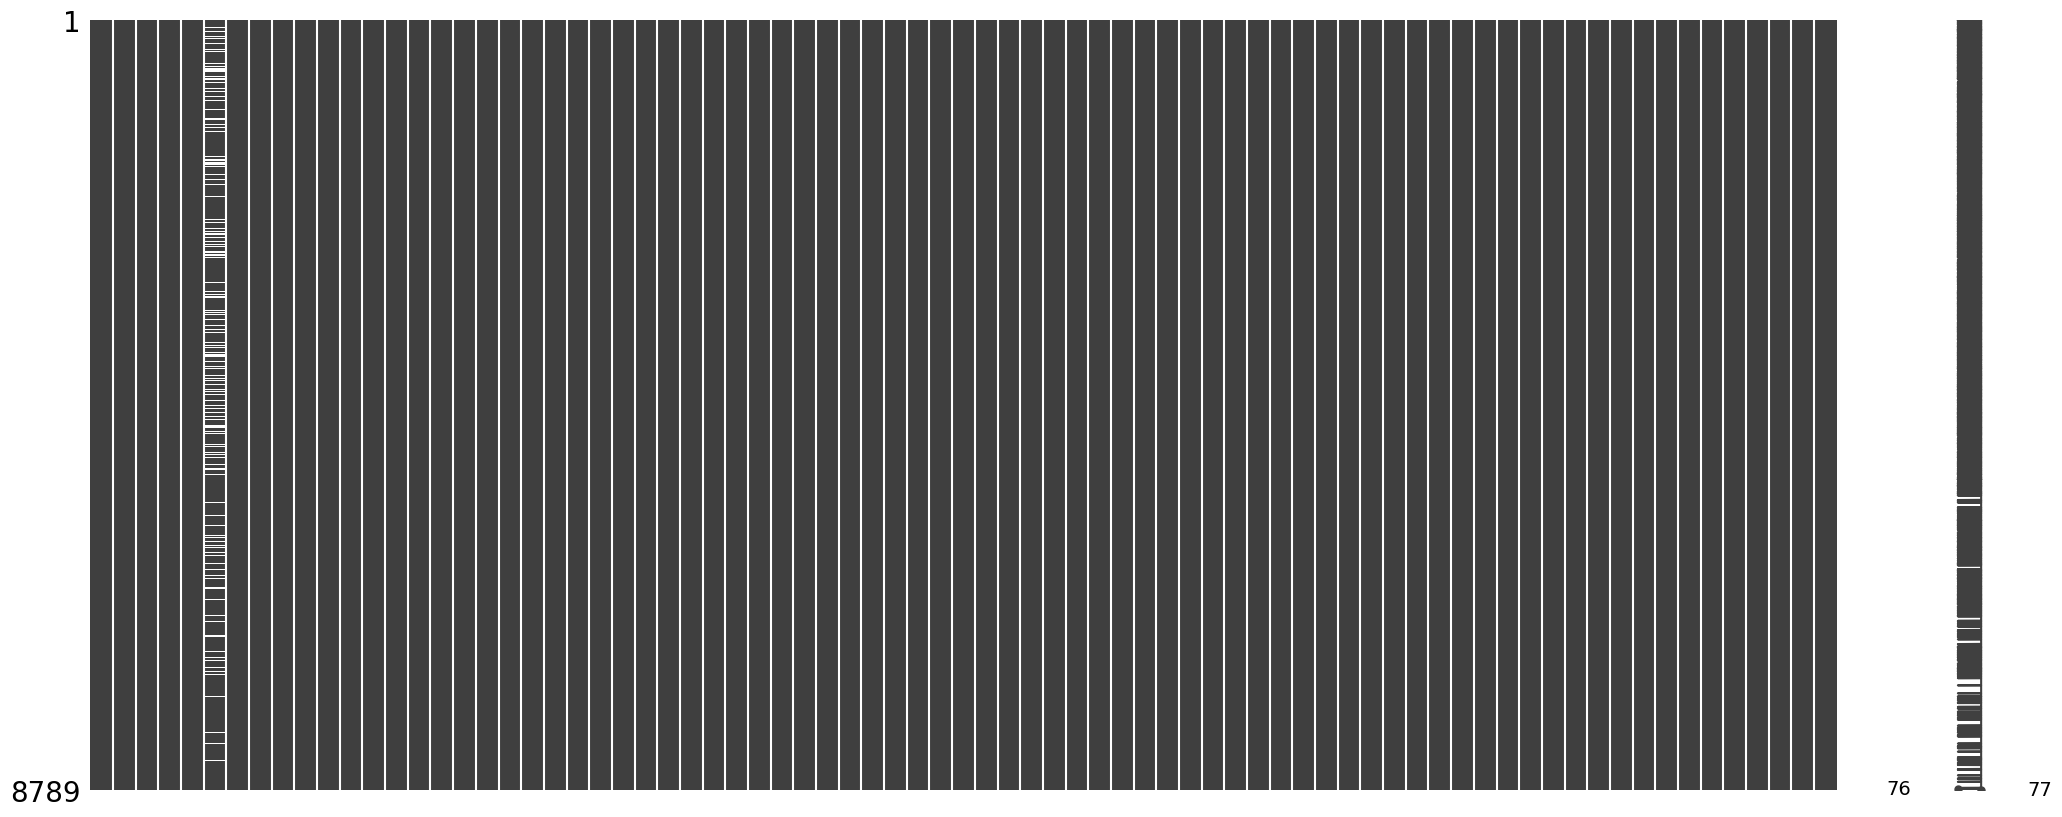

In [10]:
import missingno as msno
msno.matrix(nutrition)

#### duplicate rows
there are no duplicates. 

In [11]:
# check for duplicate rows
duplicate_rows = nutrition.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask = nutrition.duplicated(keep=False)

# use mask to filter and display both the original and duplicate rows
duplicate_rows_df = nutrition[duplicate_mask]
duplicate_rows_df

There are 0 duplicate row(s).



,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water


## data cleaning
- we know that most columns contain a mixture of numbers (for amounts) and units (g for grams, mg for milligrams, etc).   
- first, we check and see if the units in each column are similar to what we see in the dataset's .head() preview above, or if there are multiple units present in columns.  
- the result shows that no column contains more than one unit, but many also fall into the 'other' category. this could mean that there are other units we don't see in the .head(), or it could mean that there is no unit at all.  

In [12]:
# define a function which accepts input of a string containing a number (for the amount) plus a unit (g, mg, or mcg)
def check_unit(value):

    # first, convert each value to a string so the function can be applied
    # if a value is present (non-null), assign the string version of each value to `str_value`. if a null is encountered, an empty string is added
    str_value = str(value) if value is not None else ''

    # classify each string of letters into the following categories using `if` critera
    if 'g' in str_value:
        return 'g'          # returns "g", detecting the input is in grams
    elif 'mg' in str_value:
        return 'mg'         # returns "mg", detecting the input is in milligrams
    elif 'mcg' in str_value:
        return 'mcg'         # returns "mcg", detecting the input is in micrograms
    else:
        return 'other'      # returns "other", detecting the input is something else

# define an empty dictionary with which to store results
column_units = {}

# this nested `for` loop applies `check_unit` function to all items in a df
for column in nutrition.select_dtypes(include=['object', 'float']):       # iterates through columns in given dataframe
    units_in_column = set()     # initializes an empty set called `units_in_columms` (a set is used because it will automatically show duplicates only once)
    for value in nutrition[column]:        # then, the nested loop iterates thru the values in each column
        unit = check_unit(value)    # the `check_unit` function is called for each value
        units_in_column.add(unit)   # the result returned from `check_unit` is then stored in the set, `units_in_column`
    column_units[column] = units_in_column  # once the inner loop finishes, the units found are stored in the `column_units` dictionary with column names as keys

column_units  # the results are printed


{'name': {'g', 'other'},
 'serving_size': {'g'},
 'total_fat': {'g'},
 'saturated_fat': {'g', 'other'},
 'cholesterol': {'g', 'other'},
 'sodium': {'g', 'other'},
 'choline': {'g', 'other'},
 'folate': {'g', 'other'},
 'folic_acid': {'g', 'other'},
 'niacin': {'g', 'other'},
 'pantothenic_acid': {'g', 'other'},
 'riboflavin': {'g', 'other'},
 'thiamin': {'g', 'other'},
 'vitamin_a': {'g', 'other'},
 'vitamin_a_rae': {'g', 'other'},
 'carotene_alpha': {'g', 'other'},
 'carotene_beta': {'g', 'other'},
 'cryptoxanthin_beta': {'g', 'other'},
 'lutein_zeaxanthin': {'g', 'other'},
 'vitamin_b12': {'g', 'other'},
 'vitamin_b6': {'g', 'other'},
 'vitamin_c': {'g', 'other'},
 'vitamin_d': {'other'},
 'vitamin_e': {'g', 'other'},
 'tocopherol_alpha': {'g', 'other'},
 'vitamin_k': {'g', 'other'},
 'calcium': {'g', 'other'},
 'copper': {'g', 'other'},
 'irom': {'g', 'other'},
 'magnesium': {'g', 'other'},
 'manganese': {'g', 'other'},
 'phosphorous': {'g', 'other'},
 'potassium': {'g', 'other'},
 

- to determine what 'other' means for each column, we will modify the function to filter for numeric values.  
- the resulting output shows that the 'other' category just meant that a value doesn't have any unit .  
- the output shows that columns fall into one of four situations:  
1. all values in the column are non-numeric. (`name` column)   
2. all values in the column are numeric. (`calories`, `lucopene`)  
3. all values in the column have some unit  
4. some values in the column have a unit, some are numeric-only. for the ones with unit, the unit is the same throughout the column. since we're not sure whether numeric-only just means the unit was forgotten or whether it indicates something in particular, we will keep this in mind when the time comes to analyze the data.  
5. some values in the column have a unit, some are missing (nan). for the ones with unit, the unit is the same throughout the column. (the only column this applies to is `saturated_fat`). 

In [13]:
# define a function which accepts input of a string containing a number (for the amount) plus a unit (g, mg, or mcg)
def check_unit(value):

    # first, convert each value to a string so the function can be applied
    # if a value is present (non-null), assign the string version of each value to `str_value`. if a null is encountered, an empty string is added
    str_value = str(value) if value is not None else ''
    
    # then, extract non-numeric information from each item in `str_value` and assign the result to `non_numeric`
    # the filter() tests each string using the lambda, which iterates thru the string and captures only non-digits and decimals ('.')
    # the outer method, ''.join(), concatenates any non-numeric characters found into one string
    # .strip() removes extra white spaces
    non_numeric = ''.join(filter(lambda x: not x.isdigit() and x != '.', str_value)).strip()
    return non_numeric if non_numeric else 'numeric'  # if `non_numeric` contains information it is returned; if it is empty, `numeric` is returned

# define an empty dictionary with which to store results
column_units = {}

# this nested `for` loop applies `check_unit` function to all items in a df
for column in nutrition.select_dtypes(include=['object', 'float', 'int']).columns:   # iterates through columns in given dataframe
    units_in_column = set()     # initializes an empty set called `units_in_columms` (a set is used because it will automatically show duplicates only once)
    for value in nutrition[column]:        # then, the nested loop iterates thru the values in each column
        unit = check_unit(value)    # the `check_unit` function is called for each value
        units_in_column.add(unit)   # the result returned from `check_unit` is then stored in the set, `units_in_column`
    column_units[column] = units_in_column  # once the inner loop finishes, the units found are stored in the `column_units` dictionary with column names as keys

column_units  # the results are printed

{'Unnamed: 0': {'numeric'},
 'name': {'Plantains, cooked',
  'Cereals, dry, quick, white, hominy grits, QUAKER',
  'Veal, braised, cooked, separable lean only, loin',
  'Beef, raw, select, trimmed to " fat, separable lean and fat, lip off, boneless, rib eye steak',
  "CAMPBELL'S Red and White, condensed, Chicken Broth",
  'Chicken, roasted, cooked, meat and skin, leg, broilers or fryers',
  'Strawberries, whole, sweetened, frozen',
  'Beverages, Protein powder whey based',
  'Chicken, batter, fried, cooked, meat and skin, neck, broilers or fryers',
  'Mollusks, raw, wild, eastern, oyster',
  'Cornmeal, enriched, degermed, self-rising, white',
  'Lamb, raw, choice, trimmed to /" fat, separable lean and fat, loin, domestic',
  'HORMEL ALWAYS TENDER, Teriyaki-Flavored, Pork Tenderloin',
  'Pie, lemon, fried pies',
  'Pork, unheated, separable lean and fat, bone-in, slice, ham -- water added, cured',
  'Pie crust, made with enriched flour, unbaked, frozen, deep dish',
  'Cookies, Marie bis

- to make units more clear, we can add an argument to rename the columns with their unit appended.   
- it will avoid `name` column altogether because it contains no unit info  
- it will specify units for dictionary items with multiple entries by avoiding the strings `numeric` and `nan`  

In [14]:
# define a function which accepts input of a string containing a number (for the amount) plus a unit (g, mg, or mcg)
def check_unit(value):
    # first, convert each value to a string so the function can be applied
    # if a value is present (non-null), assign the string version of each value to `str_value`. if a null is encountered, an empty string is added
    str_value = str(value) if value is not None else ''
    
    # then, extract non-numeric information from each item in `str_value` and assign the result to `non_numeric`
    # the filter() tests each string using the lambda, which iterates thru the string and captures only non-digits and decimals ('.')
    # the outer method, ''.join(), concatenates any non-numeric characters found into one string
    # .strip() removes extra white spaces
    non_numeric = ''.join(filter(lambda x: not x.isdigit() and x != '.', str_value)).strip()
    return non_numeric if non_numeric else 'numeric'  # if `non_numeric` contains information it is returned; if it is empty, `numeric` is returned

# define an empty dictionary with which to store the differet resulting units, with column names as keys
column_units = {}
# defines an empty dictionary with which to store the new column names as values, with old column names as their keys
renamed_columns = {}

# this nested `for` loop applies `check_unit` function to all items in a df
for column in nutrition.select_dtypes(include=['object', 'float', 'int']).columns:   # iterates through columns in given dataframe
    if column == 'name':   # with the exception of `name`, which contains item descriptions
        continue            # tells the for loop to skip this column

    units_in_column = set()    # initializes an empty set called `units_in_columms` (a set is used because it will automatically show duplicates only once)
    
    # this inner loop will use the `check_unit` function on the values in columns
    for value in nutrition[column]:        # then, the nested loop iterates thru the values in each column
        unit = check_unit(value)    # the `check_unit` function is called for each value
        units_in_column.add(unit)   # the result returned from `check_unit` is then stored in the set, `units_in_column`
    column_units[column] = units_in_column  # once this inner loop finishes, the units found are stored in the `column_units` dictionary with column names as keys

    # use a list comprehension and 
    # create `units` list which is like `units_in_column` but leaves out 'numeric' and 'nan' items
    units = [u for u in units_in_column if u not in ['numeric', 'nan']]

    # for each item in `unit` list which is filled (not empty), rename the column with the present item
    if units:
        unit_to_add = units[0]  # grab the first (and only) unit
        new_column_name = f"{column}_{unit_to_add}"  # use constructor to append the unit's value to the column name in the format "_unit"
        renamed_columns[column] = new_column_name  # add the new column name as a value to each old column name key in the `renamed_columns` dictionary

nutrition.rename(columns=renamed_columns, inplace=True)  # carry out the renaming of the columns, using the `renamed_columns` dictionary as a mapping

nutrition.columns  # print the new column names

Index(['Unnamed: 0', 'name', 'serving_size_g', 'calories', 'total_fat_g',
       'saturated_fat_g', 'cholesterol_mg', 'sodium_mg', 'choline_mg',
       'folate_mcg', 'folic_acid_mcg', 'niacin_mg', 'pantothenic_acid_mg',
       'riboflavin_mg', 'thiamin_mg', 'vitamin_a_IU', 'vitamin_a_rae_mcg',
       'carotene_alpha_mcg', 'carotene_beta_mcg', 'cryptoxanthin_beta_mcg',
       'lutein_zeaxanthin_mcg', 'lucopene', 'vitamin_b12_mcg', 'vitamin_b6_mg',
       'vitamin_c_mg', 'vitamin_d_IU', 'vitamin_e_mg', 'tocopherol_alpha_mg',
       'vitamin_k_mcg', 'calcium_mg', 'copper_mg', 'irom_mg', 'magnesium_mg',
       'manganese_mg', 'phosphorous_mg', 'potassium_mg', 'selenium_mcg',
       'zink_mg', 'protein_g', 'alanine_g', 'arginine_g', 'aspartic_acid_g',
       'cystine_g', 'glutamic_acid_g', 'glycine_g', 'histidine_g',
       'hydroxyproline_g', 'isoleucine_g', 'leucine_g', 'lysine_g',
       'methionine_g', 'phenylalanine_g', 'proline_g', 'serine_g',
       'threonine_g', 'tryptophan_g', 'ty

- then, we can remove the units from the individual values, converting them to floats so the data can be analyzed.  

In [15]:
# iterate through columns in `nutrition`
for column in nutrition.columns:
    # detects columns with an understcore ("_"), which indicate possible presence of a newly appended unit
    if '_' in column:
        # to mitigate the multiple underscores in certain columns, this splits up these columns and stores each as a list of strings between underscores
        unit = column.split('_')[-1]  # the [-1] will select the last item in the list, as that is the appended unit

        # below, the column values are stripped of their units and converted to floats
        # values are converted to strings first using .astype(str)
        # the particular `unit` is found and replaced with a white space using str.replace(unit, '')
        # then the white space is stripped using str.strip()
        # finally the to_numeric() function converts strings to floats. errors='coerce' will ensure null values are set to 'NaN'
        nutrition[column] = pd.to_numeric(nutrition[column].astype(str).str.replace(unit, '').str.strip(), errors='coerce')

nutrition.head()  # check the results


,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,0,Cornstarch,100,381,0.1,NaN,0,9.0,0.4,0.0,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100,25,0.2,NaN,0,2.0,6.9,22.0,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


Rechecking our msising values again. we can see that several values in the `vitamin_a_IU` column are now NaN because these ones contained `mcg` rather than `IU`. 

In [16]:
# check for missing values
missing_values = nutrition.isnull().sum()

# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])

# calculate the percentage of missing values for each column
missing_pct = ((missing_values / nutrition.shape[0] * 100).round(3))
# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct

# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

,Count Missing,% Missing
saturated_fat_g,1590,18.091
vitamin_a_IU,7,0.080


examining the 7 missing values for `vitamin_a_IU`, they occur at indexes 1091, 1391, 1628, 2150, 2460, 3598, and 7422

after clearing outputs and examining these indexes' values prior to their turning into NaNs, we see these are the original values:  
1091 = 0.00 mcg, 1391 = 0.00 mcg, 1628 = 0.00 mcg, 2150 = 0.00 mcg, 2460 = 0.00 mcg, 3598 = 89.00 mcg, 7422 = 17.00 mcg

below, we impute the indexes with original values of 0 mcg and convert the other two using the conversion of 1 IU = 0.3 mcg.  

now that we've turned everything into numerical values, we'll also fill in as many of `saturated_fat_g` with the zeroes in `total_fat_g`.  

In [17]:
nutrition.query("vitamin_a_IU != vitamin_a_IU")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
1091,1091,"KEEBLER, Cookies, ANIMALS",100,450,14.0,4.5,0,468.0,0.0,98.0,...,14.20,4.500,3.200,5.300,0.0,0.0,0.00,0.0,0.0,2.80
1391,1391,"KASHI, Toasted Asiago Crackers, TLC",100,420,14.0,2.2,5,659.0,0.0,20.0,...,13.80,2.200,5.900,3.900,5.0,0.0,0.00,0.0,0.0,2.30
1628,1628,"KASHI, Sea Salt, Pita Crisps, TLC",100,381,9.2,0.9,0,585.0,0.0,19.0,...,9.20,0.900,4.400,2.900,0.0,0.0,0.00,0.0,0.0,2.50
2150,2150,"Sea lion, meat (Alaska Native), Steller",100,120,1.9,NaN,64,62.0,0.0,0.0,...,1.88,0.000,0.100,0.000,64.0,0.0,1.10,0.0,0.0,71.20
2460,2460,"KASHI, Original 7-Grain Crackers, TLC",100,385,12.0,1.2,0,530.0,0.0,41.0,...,11.90,1.200,5.500,3.900,0.0,0.0,0.00,0.0,0.0,2.50
3598,3598,"Sea lion, meat with fat (Alaska Native), Steller",100,242,15.0,2.9,66,80.0,0.0,0.0,...,14.65,2.900,3.300,3.000,66.0,0.0,0.90,0.0,0.0,56.80
7422,7422,"KFC, meat and skin with breading, Breast, ORIG...",100,231,13.0,3.0,81,606.0,0.0,0.0,...,13.11,2.981,4.653,4.166,81.0,0.0,2.51,0.0,0.0,56.16


In [18]:
# 1 IU vitamin A  = 0.3mcg of retinol (the form predominant in animal meat)
# 89.00 mcg = (1 IU / 0.3 mcg) 
print("impute the following for `vitamin_a_IU` for index 3598: ", 89.00 / 0.3)
print("impute the following for `vitamin_a_IU` for index 7422: ", 17.00 / 0.3)

impute the following for `vitamin_a_IU` for index 3598:  296.6666666666667
impute the following for `vitamin_a_IU` for index 7422:  56.66666666666667


In [19]:
# replacing missing values in vitamin a column
nutrition.loc[1091, 'vitamin_a_IU'] = '0.00'
nutrition.loc[1391, 'vitamin_a_IU'] = '0.00'
nutrition.loc[1628, 'vitamin_a_IU'] = '0.00'
nutrition.loc[2150, 'vitamin_a_IU'] = '0.00'
nutrition.loc[2460, 'vitamin_a_IU'] = '0.00'
nutrition.loc[3598, 'vitamin_a_IU'] = '296.666667'
nutrition.loc[7422, 'vitamin_a_IU'] = '56.666667'

In [20]:
# identify rows where `total_fat` is zero
zero_fat_rows = nutrition['total_fat_g'] == 0.0

# replace any NaN in `saturated_fat` column corresponding to the above rows
nutrition.loc[zero_fat_rows, 'saturated_fat_g'] = nutrition.loc[zero_fat_rows, 'saturated_fat_g'].fillna(0.0)

In [21]:
# check for missing values
missing_values = nutrition.isnull().sum()
# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])
# calculate the percentage of missing values for each column
missing_pct = ((missing_values / nutrition.shape[0] * 100).round(3))
# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct
# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

,Count Missing,% Missing
saturated_fat_g,1139,12.959


## Creating a score system for foods using the Nutrient Rich Foods Index   
*"This NRF algorithm was represented by the sum of the percentage of the daily values of 9 nutrients to encourage (protein, fiber, vitamin A, vitamin C, vitamin E, calcium, iron, magnesium, and potassium) minus the sum of the percentage of the maximum recommended values for 3 nutrients to limit (saturated fat, added sugar, and sodium)."*  
Drewnowski A. The Nutrient Rich Foods Index helps to identify healthy, affordable foods. Am J Clin Nutr. 2010 Apr;91(4):1095S-1101S. doi: 10.3945/ajcn.2010.28450D. Epub 2010 Feb 24. PMID: 20181811.
https://pubmed.ncbi.nlm.nih.gov/20181811/#:~:text=Background%3A%20The%20Nutrient%20Rich%20Foods,are%20both%20nutritious%20and%20affordable.  

(note: recc. daily values vary based on age, sex, lifestyle, pregnancy etc.)

**daily values of 9 nutrients to encourage:**   
1. protein: RDA (recc. daily allowance) for a 154 lb adult = ~56 g/day  
2. fiber: AI (adequate intake) is 25g/day for women, 38g/day for men  
3. vitamin A: RDA is 900mcg RAE (Retinol Activity Equivalents) per day for men, and 700 mcg RAE per day for women  
4. vitamin C: RDA for Vitamin C is 90 mg/day for men and 75 mg/day for women. For smokers, an additional 35 mg per day is recommended   
5. vitamin E: RDA is 15 mg (or 22.4 IU) of alpha-tocopherol per day     
6. calcium: RDA is 1,000 mg/day for adults up to age 50 for men, and up to age 70 for women. 1,200 mg/day for women over 51 and men over 71  
7. iron: RDA is 8 mg/day for men and 18 mg/day for women (ages 19-50), and 8 mg/day for women over 51  
8. magnesium: RDA is 400-420 mg/day for men and 310-320 mg/day for women  
9. potassium: AI is 2,600 mg/day for women and 3,400 mg/day for men  

**daily values of the maximum recommended values for 3 nutrients to limit:**  
1. saturated fat: the Dietary Guidelines for Americans recommend limiting saturated fat to less than 10% of total daily calories. For someone consuming 2,000 calories a day, this would be less than 20 grams of saturated fat per day   
2. added sugar: the Dietary Guidelines for Americans advise limiting added sugars to less than 10% of your daily caloric intake. For a 2,000-calorie diet, this equates to less than 50 grams of added sugars per day. The American Heart Association goes further, recommending no more than 6 teaspoons (25 grams) of added sugar per day for women and 9 teaspoons (38 grams) for men  
3. sodium: the Dietary Guidelines for Americans suggest consuming less than 2,300 milligrams (mg) of sodium per day as part of a healthy eating pattern. The American Heart Association recommends an ideal limit of no more than 1,500 mg per day for most adults, especially for those with high blood pressure  


**calculation of nutrient scores**  
each nutrient amount is divided by its daily recommended value and then by the listed calorie content. this results in the nutrient density. the score for each nutrient amount per 100g is the proportion of it to its daily recommendation (or limit, for negative nutrients).    

1. **(+) protein:**  
protein nutrient score = (*protein_g* / 56g) / *`calories`*  

2. **(+) fiber:**    
fiber nutrient score (average) = (*`fiber_g`*/ 31.5g) / *`calories`*  

3. **(+) vitamin A:**    
vitamin A nutrient score (average) = ((*`vitamin_a_IU`* /0.3)/ 800mcg) / *`calories`*  

4. **(+) vitamin C:**    
vitamin C nutrient score (average, not including smokers) = (*`vitamin_c_mg`* / 82.5mg) / *`calories`*      

5. **(+) vitamin E:**    
vitamin E nutrient score = (*`vitamin_e_mg`* / 15mg) / *calories*  

6. **(+) calcium:**    
calcium nutrient score (average) = (*`calcium_mg`* / 1100mg) / *calories* 

7. **(+) iron:**    
iron nutrient score (average) = (*iron_mg* / 13mg) / *calories*  

8. **(+) magnesium:**    
magnesium nutrient score (average) = (*`magnesium_mg`* / 362.5mg) / *calories*     <- averaged between the given range   

9. **(+) potassium:**  
potassium nutrient score (average) = (*`potassium_mg`* / 3000mg) / *calories* 

1. **(-) saturated fat:**  
saturated fat nutrient score = (*`saturated_fat_g`* / 20g) / *calories*   

2. **(-) added sugar:**  
added sugar nutrient score = (*`sugars_g`* / 20g) / *calories*   
***note: since no data on specifically "added" sugars, we will use the `sugars` column as a rough approximation.  

3. **(-) sodium:**  
sodium nutrient score (recommended) = (*`sodium_mg`* / 2300mg) / *calories* 
sodium nutrient score (ideal) = (*`sodium_mg`* / 1500mg) / *calories* 

b. take the sum of all the positive nutrient scores and the negative scores. Then subtract the negative scores from the positive, resulting in the overall NRF score for each item.  
NRF=∑(positive nutrient scores)−∑(negative nutrient scores)

c. analyze: foods with higher NRF scores are more nutrient-rich and healthy in general.  

** Notes: 
- we will not apply the function to food items which are zero-calorie (there are many drinks/drink mixes like this)
- also we will avoid rows for which saturated fat is NaN because it is so integral to the calculation. this could be altered once those values are filled or deemed to be zero  

In [38]:
# define functions to calculate NRF score for each food item 
# NRF algorithm for average adult 
def NRF_score_adult(row):
    calories = row['calories']  # define calories for the food item as one variable
    if (calories > 0) and (row['saturated_fat_g'] == row['saturated_fat_g']):  # apply the function only to rows where we know saturated fat and are >0 calories
        
        # scores for positive nutrients
        protein_score = (row['protein_g']/56)/calories
        fiber_score = (row['fiber_g']/31.5)/calories  
        vitamin_a_score = ((row['vitamin_a_IU']/0.3)/900)/calories  
        vitamin_c_score = (row['vitamin_c_mg']/82.5)/calories
        vitamin_e_score = (row['vitamin_e_mg']/15)/calories
        calcium_score = (row['calcium_mg']/1100)/calories   
        iron_score = (row['irom_mg']/13)/calories            
        magnesium_score = (row['magnesium_mg']/362.5)/calories
        potassium_score = (row['potassium_mg']/3000)/calories

        # scores for negative nutrients
        sat_fat_score = (row['saturated_fat_g']/20)
        sugar_score = (row['sugars_g']/20)
        sodium_score = (row['sodium_mg']/2300)
    
        # calculate totals for positive and negative
        positive_nutrients = protein_score + fiber_score + vitamin_a_score + vitamin_c_score + vitamin_e_score + calcium_score + iron_score + magnesium_score + potassium_score
        negative_nutrients = sat_fat_score + sugar_score + sodium_score

        # the overall NRF score is returned
        return positive_nutrients - negative_nutrients

# ensure all involved columns are numerical
columns_to_convert = ['protein_g', 'fiber_g', 'vitamin_a_IU', 'vitamin_c_mg', 'vitamin_e_mg', 
                      'calcium_mg', 'irom_mg', 'magnesium_mg', 'potassium_mg', 'saturated_fat_g', 'sugars_g', 
                      'sodium_mg', 'calories']
for col in columns_to_convert:
    nutrition[col] = pd.to_numeric(nutrition[col], errors='coerce')

# apply the function using multiple columns as inputs (axis=1), storing results in new columns
nutrition['NRF_score_adult'] = nutrition.apply(NRF_score_adult, axis=1)

In [39]:
# Scaling scores using z-score normalization (AKA standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # instantiate the standardscaler
# apply the normalization and store result new columns
nutrition['NRF_score_adult_normalized'] = scaler.fit_transform(nutrition['NRF_score_adult'].values.reshape(-1, 1))

In [40]:
# Scaling scores using min-max method 
from sklearn.preprocessing import MinMaxScaler
# instantiate MinMax scaler with range of 0-10 for client interpretability
scaler = MinMaxScaler(feature_range=(0, 10))
# apply the scaling and store results in new columns
nutrition['NRF_score_adult_scaled'] = scaler.fit_transform(nutrition['NRF_score_adult'].values.reshape(-1, 1))

In [33]:
# 
fast_food_pattern = re.compile(r"mcdonalds|mcdonald's|burger king|kfc|kentucky fried chicken|subway|taco bell|wendys|wendy's|dominos|domino's pizza|pizza hut|starbucks|dunkin|dunkin' donuts|dunkin' doughnuts|chick-fil-a|chick fil a|chickfila|five guys|chipotle|panda express|little caesars|sonic|arbys|arby's|jack in the box|whataburger|in-n-out|in n out|innout")
mcdonalds_pattern = re.compile(r"mcdonalds|mcdonald's")
burger_king_pattern = re.compile(r'burger king')
kfc_pattern = re.compile(r'kfc|kentucky fried chicken')
subway_pattern = re.compile(r'subway')
taco_bell_pattern = re.compile(r'taco bell')
wendys_pattern = re.compile(r"wendys|wendy's")
dominos_pattern = re.compile(r"dominos|domino's pizza")
pizza_hut_pattern = re.compile(r'pizza hut')
starbucks_pattern = re.compile(r'starbucks')
dunkin_pattern = re.compile(r"dunkin|dunkin' donuts|dunkin' doughnuts")
chick_fil_a_pattern = re.compile(r'chick-fil-a|chick fil a|chickfila')
five_guys_pattern = re.compile(r'five guys')
chipotle_pattern = re.compile(r'chipotle')
panda_express_pattern = re.compile(r'panda express')
little_caesars_pattern = re.compile(r'little caesars')
sonic_pattern = re.compile(r'sonic')
arbys_pattern = re.compile(r"arbys|arby's")
jack_in_the_box_pattern = re.compile(r'jack in the box')
whataburger_pattern = re.compile(r'whataburger')
in_n_out_pattern = re.compile(r'in-n-out|in n out|innout')

# 
def contains_fast_food(item):
    if fast_food_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['fast food?'] = nutrition['name'].apply(contains_fast_food)

In [34]:
def fast_food_chains(item):
    fast_food_chains = {
        'Mcdonalds': mcdonalds_pattern,
        'Burger King': burger_king_pattern,
        'KFC': kfc_pattern,
        'Subway': subway_pattern,
        'Taco Bell': taco_bell_pattern,
        "Wendys": wendys_pattern,
        'Dominos': dominos_pattern,
        'Pizza Hut': pizza_hut_pattern,
        'Starbucks': starbucks_pattern,
        "Dunkin Donuts": dunkin_pattern,
        'Chick fil A': chick_fil_a_pattern,
        'Five Guys': five_guys_pattern,
        'Chipotle': chipotle_pattern,
        'Panda Express': panda_express_pattern,
        'Little Caesars': little_caesars_pattern,
        'Sonic': sonic_pattern,
        'Arbys': arbys_pattern,
        'Jack In the Box': jack_in_the_box_pattern,
        'Whataburger': whataburger_pattern,
        'In-n-Out': in_n_out_pattern
    }

    chains = []

    for chain, pattern in fast_food_chains.items():
        if pattern.search(item):
            chains.append(chain)

    return ', '.join(chains) if chains else 'None'

nutrition['Fast Food Chain'] = nutrition['name'].apply(fast_food_chains)
pd.reset_option('all')
nutrition.query("`fast food?` == True")

/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_13339/3772103021.py:34: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_13339/3772103021.py:34: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_13339/3772103021.py:34: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_nuts_seeds_soy,contains_seafood,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,Fast Food Chain
31,31,"mcdonald's, side salad",100,20,0.2,NaN,0,12.0,0.0,57.0,...,False,False,False,True,False,True,False,True,Dairy,Mcdonalds
34,34,"mcdonald's, hash brown",100,271,16.0,2.3,0,580.0,0.0,12.0,...,False,False,False,True,False,True,False,True,Dairy,Mcdonalds
62,62,"wendy's, french fries",100,301,14.0,2.8,0,219.0,33.0,0.0,...,False,False,False,True,False,True,False,True,Dairy,Wendys
83,83,"mcdonald's, hamburger",100,264,10.0,3.5,27,494.0,0.0,64.0,...,False,False,False,True,False,True,False,True,Protein,Mcdonalds
100,100,"taco bell, taco salad",100,170,9.2,3.0,19,363.0,0.0,43.0,...,False,False,False,True,False,True,False,True,Dairy,Taco Bell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,7380,"little caesars 14"" original round meat and veg...",100,243,11.0,4.6,31,578.0,0.0,0.0,...,False,False,False,True,False,True,False,True,Dairy,Little Caesars
7421,7421,"kfc, meat and skin with breading, drumstick, e...",100,274,18.0,3.9,109,632.0,0.0,0.0,...,False,False,False,True,False,True,False,True,Protein,KFC
7422,7422,"kfc, meat and skin with breading, breast, orig...",100,231,13.0,3.0,81,606.0,0.0,0.0,...,False,False,False,True,False,True,False,True,Protein,KFC
7525,7525,"subway, tomato and sweet onion sauce, sweet on...",100,155,2.4,0.5,22,305.0,0.0,58.0,...,False,False,False,True,False,True,False,True,Grain,Subway


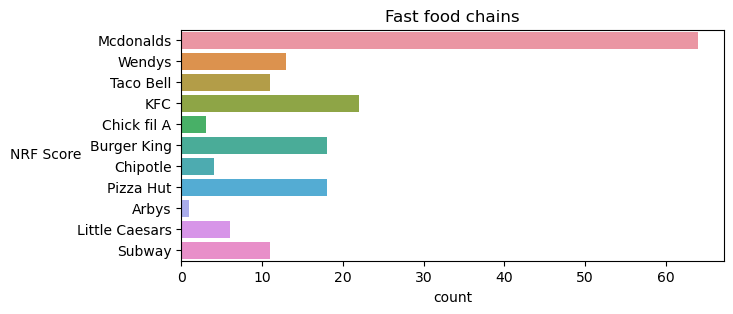

In [48]:
# Plot: 
import matplotlib.pyplot as plt
import seaborn as sns
fast_food = nutrition.query("`fast food?` == True")
f, ax = plt.subplots(figsize=(7, 3))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='Fast Food Chain', ax=ax, data=fast_food)
ax.set_title('Fast food chains')
ax.set_ylabel('NRF Score', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

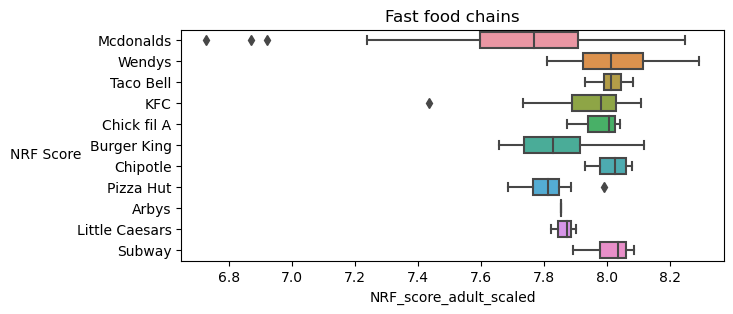

In [90]:
# Plot: 
fast_food = nutrition.query("`fast food?` == True")
f, ax = plt.subplots(figsize=(7, 3))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='Fast Food Chain', x='NRF_score_adult_scaled', ax=ax, data=fast_food)
ax.set_title('Fast food chains')
ax.set_ylabel('NRF Score', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

In [43]:
# 
#cheese_pattern = re.compile(r"mcdonalds|mcdonald's|burger king|kfc|kentucky fried chicken|subway|taco bell|wendys|wendy's|dominos|domino's pizza|pizza hut|starbucks|dunkin|dunkin' donuts|dunkin' doughnuts|chick-fil-a|chick fil a|chickfila|five guys|chipotle|panda express|little caesars|sonic|arbys|arby's|jack in the box|whataburger|in-n-out|in n out|innout")
cheddar_cheese_pattern = re.compile(r'cheddar cheese|cheddar|cheese, cheddar')
mozzarella_cheese_pattern = re.compile(r'mozzarella cheese|mozzarella|cheese, mozzarella')
parmesan_cheese_pattern = re.compile(r'parmesan cheese|parmesan|cheese, parmesan')
gouda_cheese_pattern = re.compile(r'gouda cheese|gouda|cheese, gouda')
brie_cheese_pattern = re.compile(r'brie cheese|brie|cheese, brie')
camembert_cheese_pattern = re.compile(r'camembert cheese|camembert|cheese, camembert')
blue_cheese_pattern = re.compile(r'(blue cheese|gorgonzola|roquefort|stilton|cheese, blue|cheese, gorgonzola|cheese, roquefort|cheese, stilton)')
feta_cheese_pattern = re.compile(r'feta cheese|feta|cheese, feta')
ricotta_cheese_pattern = re.compile(r'ricotta cheese|ricotta|cheese, ricotta')
goat_cheese_pattern = re.compile(r'(goat cheese|chevre|cheese, goat)')
swiss_cheese_pattern = re.compile(r'swiss cheese|swiss|cheese, swiss')
gorgonzola_cheese_pattern = re.compile(r'gorgonzola cheese|gorgonzola|cheese, gorgonzola')
havarti_cheese_pattern = re.compile(r'havarti cheese|havarti|cheese, havarti')
monterey_jack_cheese_pattern = re.compile(r'monterey jack cheese|monterey jack|cheese, monterey jack')
pecorino_cheese_pattern = re.compile(r'pecorino cheese|pecorino|cheese, pecorino')
manchego_cheese_pattern = re.compile(r'manchego cheese|manchego|cheese, manchego')
asiago_cheese_pattern = re.compile(r'asiago cheese|asiago|cheese, asiago')
halloumi_cheese_pattern = re.compile(r'halloumi cheese|halloumi|cheese, halloumi')
provolone_cheese_pattern = re.compile(r'provolone cheese|provolone|cheese, provolone')
emmental_cheese_pattern = re.compile(r'emmental cheese|emmental|cheese, emmental')
edam_cheese_pattern = re.compile(r'edam cheese|edam|cheese, edam')
colby_jack_cheese_pattern = re.compile(r'colby jack cheese|colby jack|cheese, colby jack|colby cheese|colby|cheese, colby')
cream_cheese_pattern = re.compile(r'cream cheese')

# 
def contains_cheese(item):
    if cheddar_cheese_pattern.search(item) or mozzarella_cheese_pattern.search(item) or parmesan_cheese_pattern.search(item) or gouda_cheese_pattern.search(item) or brie_cheese_pattern.search(item) or camembert_cheese_pattern.search(item) or blue_cheese_pattern.search(item) or feta_cheese_pattern.search(item) or ricotta_cheese_pattern.search(item) or goat_cheese_pattern.search(item) or swiss_cheese_pattern.search(item) or gorgonzola_cheese_pattern.search(item) or havarti_cheese_pattern.search(item) or monterey_jack_cheese_pattern.search(item) or pecorino_cheese_pattern.search(item) or manchego_cheese_pattern.search(item) or asiago_cheese_pattern.search(item) or halloumi_cheese_pattern.search(item) or provolone_cheese_pattern.search(item) or emmental_cheese_pattern.search(item) or edam_cheese_pattern.search(item) or colby_jack_cheese_pattern.search(item) or cream_cheese_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['cheese?'] = nutrition['name'].apply(contains_cheese)

In [45]:
def cheese_variety(item):
    cheese_varieties = {
        'Cheddar Cheese': cheddar_cheese_pattern,
        'Mozzarella Cheese': mozzarella_cheese_pattern,
        'Parmesan Cheese': parmesan_cheese_pattern,
        'Gouda Cheese': gouda_cheese_pattern,
        'Brie Cheese': brie_cheese_pattern,
        'Camembert Cheese': camembert_cheese_pattern,
        'Blue Cheese': blue_cheese_pattern, 
        'Feta Cheese': feta_cheese_pattern,
        'Ricotta Cheese': ricotta_cheese_pattern,
        'Goat Cheese': goat_cheese_pattern,
        'Swiss Cheese': swiss_cheese_pattern,
        'Gorgonzola Cheese': gorgonzola_cheese_pattern,
        'Havarti Cheese': havarti_cheese_pattern,
        'Monterey Jack': monterey_jack_cheese_pattern,
        'Pecorino Cheese': pecorino_cheese_pattern,
        'Manchego Cheese': manchego_cheese_pattern,
        'Asiago Cheese': asiago_cheese_pattern,
        'Halloumi Cheese': halloumi_cheese_pattern,
        'Provolone Cheese': provolone_cheese_pattern,
        'Emmental Cheese': emmental_cheese_pattern,
        'Edam Cheese': edam_cheese_pattern,
        'Colby Jack': colby_jack_cheese_pattern,
        'Cream Cheese': cream_cheese_pattern
    }

    varieties = []

    for variety, pattern in cheese_varieties.items():
        if pattern.search(item):
            varieties.append(variety)

    return ', '.join(varieties) if varieties else 'None'

# Example usage in DataFrame
nutrition['variety'] = nutrition['name'].apply(cheese_variety)

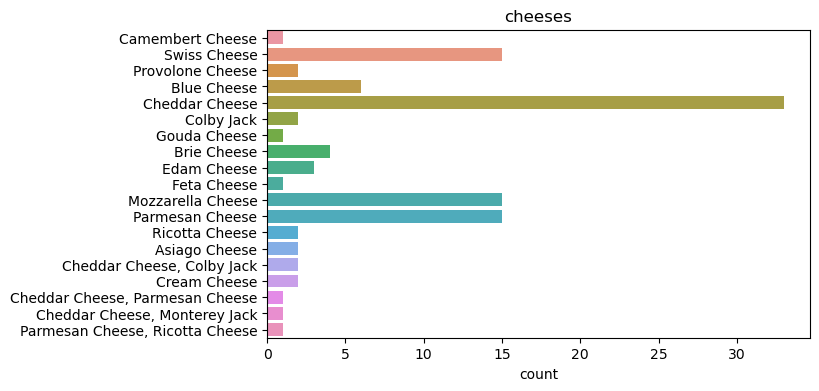

In [51]:
# Plot: 

cheeses = nutrition.query("`cheese?` == True")
f, ax = plt.subplots(figsize=(7, 4))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='variety', ax=ax, data=cheeses)
ax.set_title('cheeses')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

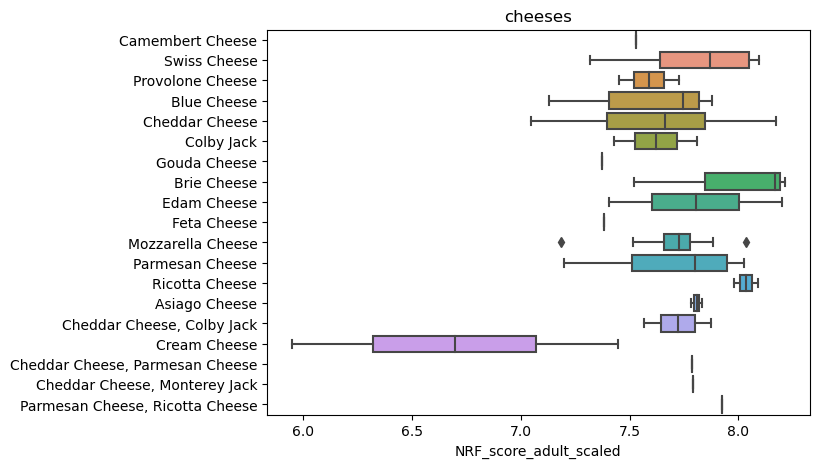

In [56]:
# Plot: 
cheeses = nutrition.query("`cheese?` == True")
f, ax = plt.subplots(figsize=(7, 5))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='variety', x='NRF_score_adult_scaled', ax=ax, data=cheeses)
ax.set_title('cheeses')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

In [ ]:
plain_yogurt_pattern = re.compile(r'plain yogurt')
greek_yogurt_pattern = re.compile(r'greek yogurt')
icelandic_yogurt_pattern = re.compile(r'(icelandic yogurt|skyr)')
australian_yogurt_pattern = re.compile(r'australian yogurt')
soy_yogurt_pattern = re.compile(r'soy yogurt')
almond_yogurt_pattern = re.compile(r'almond yogurt')
coconut_yogurt_pattern = re.compile(r'coconut yogurt')
oat_yogurt_pattern = re.compile(r'oat yogurt')
flavored_yogurt_pattern = re.compile(r'(flavored yogurt|strawberry yogurt|blueberry yogurt|vanilla yogurt|peach yogurt)')
low_fat_yogurt_pattern = re.compile(r'low-fat yogurt')
non_fat_yogurt_pattern = re.compile(r'non-fat yogurt')
full_fat_yogurt_pattern = re.compile(r'full-fat yogurt')
lactose_free_yogurt_pattern = re.compile(r'lactose-free yogurt')
probiotic_yogurt_pattern = re.compile(r'probiotic yogurt')
bulgarian_yogurt_pattern = re.compile(r'bulgarian yogurt')
indian_yogurt_pattern = re.compile(r'(indian yogurt|dahi)')
turkish_yogurt_pattern = re.compile(r'turkish yogurt')


# 
def contains_yogurt(item):
    if cheddar_cheese_pattern.search(item) or mozzarella_cheese_pattern.search(item) or parmesan_cheese_pattern.search(item) or gouda_cheese_pattern.search(item) or brie_cheese_pattern.search(item) or camembert_cheese_pattern.search(item) or blue_cheese_pattern.search(item) or feta_cheese_pattern.search(item) or ricotta_cheese_pattern.search(item) or goat_cheese_pattern.search(item) or swiss_cheese_pattern.search(item) or gorgonzola_cheese_pattern.search(item) or havarti_cheese_pattern.search(item) or monterey_jack_cheese_pattern.search(item) or pecorino_cheese_pattern.search(item) or manchego_cheese_pattern.search(item) or asiago_cheese_pattern.search(item) or halloumi_cheese_pattern.search(item) or provolone_cheese_pattern.search(item) or emmental_cheese_pattern.search(item) or edam_cheese_pattern.search(item) or colby_jack_cheese_pattern.search(item) or cream_cheese_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['yogurt?'] = nutrition['name'].apply(contains_yogurt)

In [57]:
leafy_green_vegetables_pattern = re.compile(r'(spinach|kale|collard\sgreens|mustard\sgreens|swiss\schard|turnip\sgreens|seaweed|bok\schoy|broccoli|rabe|arugula|watercress)')
red_orange_vegetables_pattern = re.compile(r'(carrot|pumpkin|sweet\spotato|red\spepper|orange\spepper|butternut\ssquash|acorn\ssquash|tomato|beet|red\sonion)')
beans_peas_pattern = re.compile(r'(black\sbeans|kidney\sbeans|pinto\sbeans|navy\sbeans|chickpeas|lentils|split\speas|green\speas|black-eyed\speas|lima\sbeans)')
starchy_vegetables_pattern = re.compile(r'(potato|corn|green\speas|butternut\ssquash|acorn\ssquash|pumpkin|plantain|yam|taro|cassava)')
other_vegetables_pattern = re.compile(r'(cucumber|bell\spepper|zucchini|squash|eggplant|lettuce|celery|cabbage|brussels\ssprouts|cauliflower|artichoke|asparagus|radish)')

def contains_vegetables(item):
    if leafy_green_vegetables_pattern.search(item) or red_orange_vegetables_pattern.search(item) or beans_peas_pattern.search(item) or starchy_vegetables_pattern.search(item) or other_vegetables_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['veggies?'] = nutrition['name'].apply(contains_vegetables)

In [59]:
def veggie_variety(item):
    veggie_varieties = {
        'Leafy Green Vegetables': leafy_green_vegetables_pattern,
        'Red/Orange Vegetables': red_orange_vegetables_pattern,
        'Beans/Peas': beans_peas_pattern,
        'Starchy Vegetables': starchy_vegetables_pattern,
        'Other Vegetables': other_vegetables_pattern,
    }

    varieties = []

    for variety, pattern in varieties.items():
        if pattern.search(item):
            varieties.append(variety)

    return ', '.join(varieties) if varieties else 'None'

nutrition['veggie_variety'] = nutrition['name'].apply(veggie_variety)

AttributeError: 'list' object has no attribute 'items'

In [60]:
def veggie_variety(item):
    veggie_varieties_patterns = {
        'Leafy Green Vegetables': leafy_green_vegetables_pattern,
        'Red/Orange Vegetables': red_orange_vegetables_pattern,
        'Beans/Peas': beans_peas_pattern,
        'Starchy Vegetables': starchy_vegetables_pattern,
        'Other Vegetables': other_vegetables_pattern,
    }

    found_veggie_varieties = []

    for variety, pattern in veggie_varieties_patterns.items():
        if pattern.search(item):
            found_veggie_varieties.append(variety)

    return ', '.join(found_veggie_varieties) if found_veggie_varieties else 'None'

nutrition['veggie_variety'] = nutrition['name'].apply(veggie_variety)

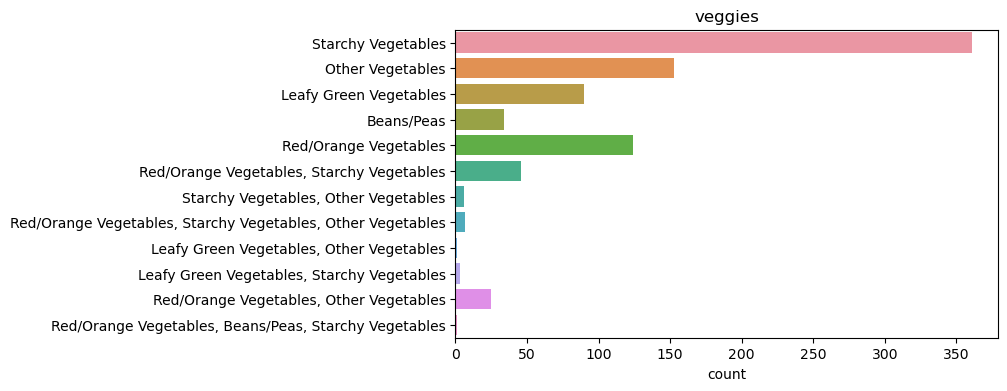

In [61]:
# Plot: 

veggies = nutrition.query("`veggies?` == True")
f, ax = plt.subplots(figsize=(7, 4))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='veggie_variety', ax=ax, data=veggies)
ax.set_title('veggies')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

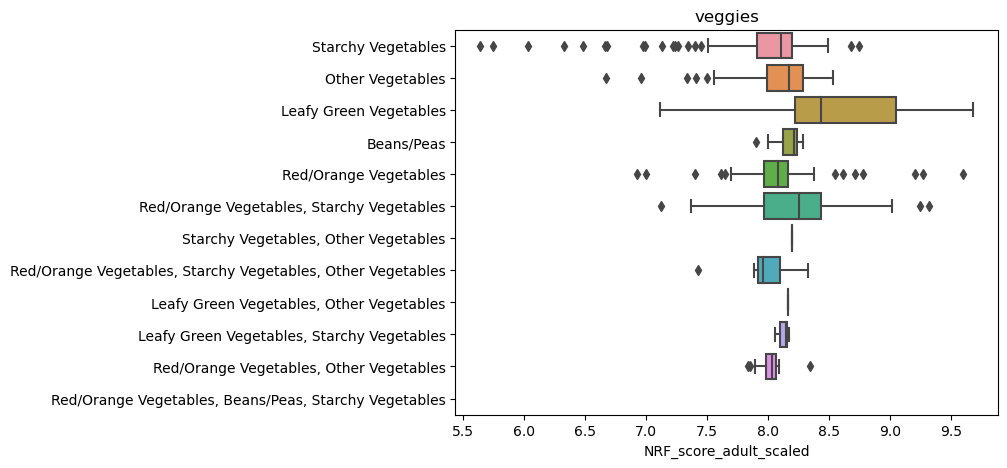

In [62]:
# Plot: 
cheeses = nutrition.query("`veggies?` == True")
f, ax = plt.subplots(figsize=(7, 5))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='veggie_variety', x='NRF_score_adult_scaled', ax=ax, data=cheeses)
ax.set_title('veggies')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

In [63]:
whole_grain_pattern = re.compile(r'(whole\swheat\sbread|brown\srice|popcorn|oatmeal|quinoa|wild\srice|bulgur|buckwheat|barley|millets|sorghum|whole\srice|whole\swheat\spasta|whole\swheat\tortillas|rye\sbread|whole\swheat\sbagels|spelt|amaranth|teff|triticale|whole\swheat\senglish\smuffins|whole\swheat\spretzels)')
refined_grain_pattern = re.compile(r'(white\sbread|white\srice|pretzels|english\smuffins|corn\stortilla|grits|regular\spasta|bagels|crackers|noodles|pancakes|waffles|white\sflour\stortillas|croissants|pita\sbread|refined\scereal|refined\swheat\sflour|refined\soat\sproducts|refined\sbarley\sproducts|refined\scorn\sproducts)')

def contains_grains(item):
    if whole_grain_pattern.search(item) or refined_grain_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['grains?'] = nutrition['name'].apply(contains_grains)

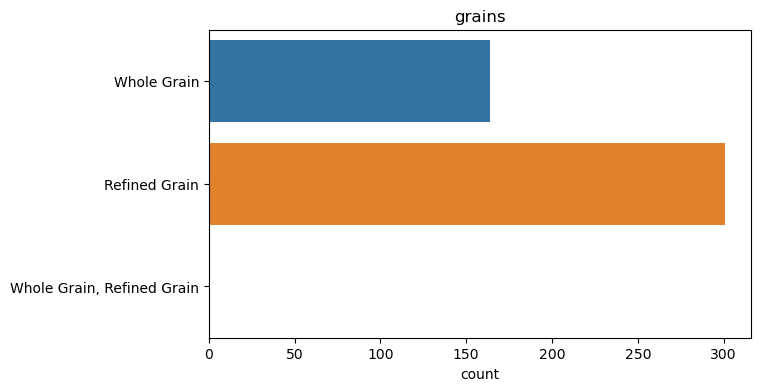

In [66]:
# Plot: 

grains = nutrition.query("`grains?` == True")
f, ax = plt.subplots(figsize=(7, 4))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='grains_variety', ax=ax, data=grains)
ax.set_title('grains')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

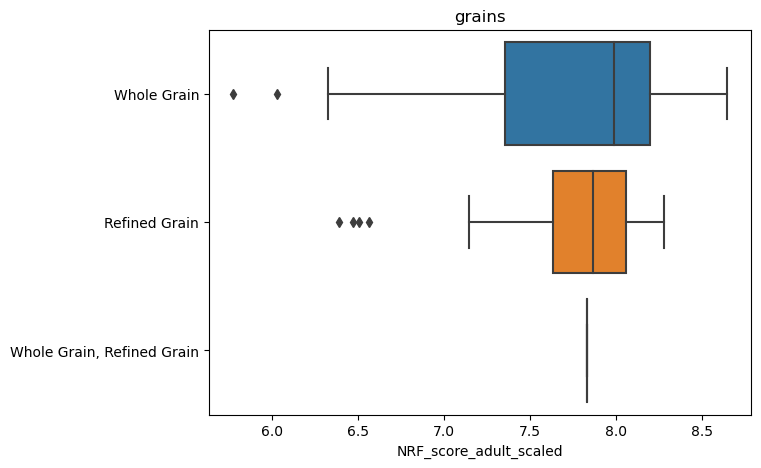

In [67]:
# Plot: 
cheeses = nutrition.query("`grains?` == True")
f, ax = plt.subplots(figsize=(7, 5))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='grains_variety', x='NRF_score_adult_scaled', ax=ax, data=cheeses)
ax.set_title('grains')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

In [65]:
def grains_variety(item):
    grains_varieties_patterns = {
        'Whole Grain': whole_grain_pattern,
        'Refined Grain': refined_grain_pattern
    }

    found_grains_varieties = []

    for variety, pattern in grains_varieties_patterns.items():
        if pattern.search(item):
            found_grains_varieties.append(variety)

    return ', '.join(found_grains_varieties) if found_grains_varieties else 'None'

nutrition['grains_variety'] = nutrition['name'].apply(grains_variety)

In [69]:
meats_pattern = re.compile(r'(?i)(Lean\sCuts|beef|goat|ham|lamb|pork|Lean\sGround\sMeats|beef|pork|Lean\sLuncheon/\sDeli\sMeats|beef|chicken|ham|pork|turkey|Game\sMeats|bear|bison|deer|elk|moose|opossum|rabbit|raccoon|squirrel|venison|Organ\sMeats|brain|chitterlings|giblets|gizzard|heart|kidney|liver|stomach|sweetbreads|tongue|tripe)')

poultry_pattern = re.compile(r'(chicken|Cornish\shen|dove|duck|goose|ostrich|pheasant|quail|turkey)')

nuts_seeds_soy_pattern = re.compile(r'(?i)(almonds|almond\sbutter|Brazil\snuts|cashew\sbutter|cashews|chestnuts|chia\sseeds|flax\sseeds|hazelnuts\s\(filberts\)|macadamia\snuts|mixed\snuts|peanut\sbutter|peanuts|pecans|pine\snuts|pistachios|pumpkin\sseeds|sesame\sbutter\sor\spaste\s\(tahini\)|sesame\sseeds|sunflower\sbutter|sunflower\sseeds|tempeh|texturized\svegetable\sprotein\s\(TVP\)|tofu\s\(made\sfrom\ssoybeans\)|veggie\sburgers\s\(made\sfrom\ssoybeans\)|walnuts)')

seafood_pattern = re.compile(r'(?i)(fish|shark|tuna|salmon|trout|mackerel|sardine|anchovy|cod|tilapia|halibut|catfish|snapper|swordfish|bass|grouper|perch|sole|flounder|crab|lobster|shrimp|prawn|clam|oyster|mussel|scallop|squid|octopus|crayfish|eel|Finfish|black\ssea\sbass|catfish|cod|flounder|freshwater\strout|haddock|hake|halibut|herring|light\stuna|mackerel|mullet|perch|pollock|salmon|sea\sbass|snapper|sole|sushi|tilapia|whiting|Shellfish|clams|crab|crayfish|lobster|mussels|octopus|oysters|scallops|shrimp|squid\s\(calamari\)|Canned\sFish|anchovies|freshwater\strout|herring|light\stuna|salmon|sardines)')

eggs_pattern = re.compile(r'(?i)(chicken\seggs|duck\seggs|egg\sproducts|quail\seggs|goose\seggs|turkey\seggs)')


def protein_sources(item):
    if meats_pattern.search(item) or poultry_pattern.search(item) or nuts_seeds_soy_pattern.search(item) or seafood_pattern.search(item) or eggs_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['protein source?'] = nutrition['name'].apply(protein_sources)

In [70]:
def protein_source_types(item):
    protein_type_patterns = {
        'Meats': meats_pattern,
        'Poultry': poultry_pattern,
        'Nuts/Seeds/Soy': nuts_seeds_soy_pattern,
        'Seafood': seafood_pattern,
        'Eggs': eggs_pattern
    }

    found_protein_types = []

    for variety, pattern in protein_type_patterns.items():
        if pattern.search(item):
            found_protein_types.append(variety)

    return ', '.join(found_protein_types) if found_protein_types else 'None'

nutrition['protein_type'] = nutrition['name'].apply(protein_source_types)

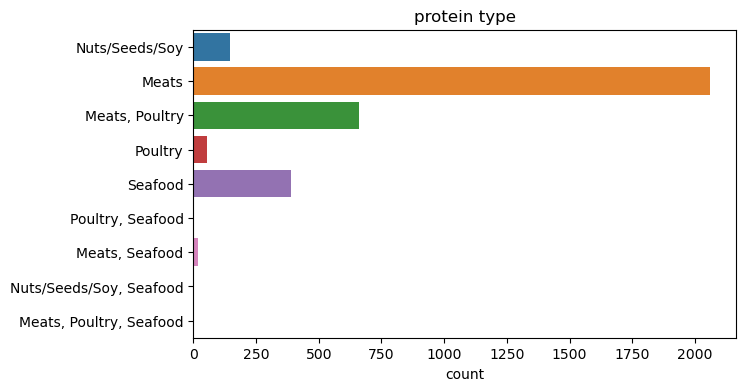

In [71]:
# Plot: 

protein_sources_filter = nutrition.query("`protein source?` == True")
f, ax = plt.subplots(figsize=(7, 4))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='protein_type', ax=ax, data=protein_sources_filter)
ax.set_title('protein type')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

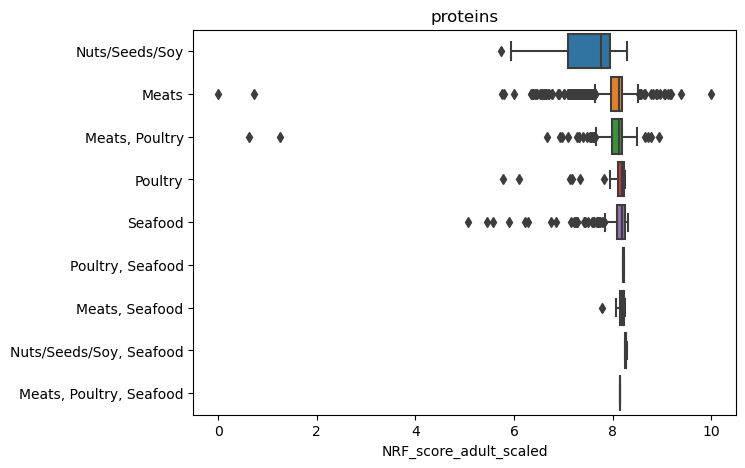

In [72]:
# Plot: 
protein_sources_filter = nutrition.query("`protein source?` == True")
f, ax = plt.subplots(figsize=(7, 5))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='protein_type', x='NRF_score_adult_scaled', ax=ax, data=protein_sources_filter)
ax.set_title('proteins')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

In [80]:
lean_meats_pattern = re.compile(r'(lean|skinless|boneless|tenderloin|sirloin)\s(meat|poultry|beef|pork|chicken|turkey)')
fatty_meat_pattern = re.compile(r'(fatty|high\s*fat)\s(meat|poultry|beef|pork|lamb|sausage|bacon|ribs)')
processed_meat_pattern = re.compile(r'(processed|deli|cured|smoked|canned)\s(meat|poultry)')
red_meat_pattern = re.compile(r'(red|beef|pork|lamb)\s(meat)')
white_meat_pattern = re.compile(r'(white)\s(meat|poultry|chicken|turkey)')
game_meat_pattern = re.compile(r'(game|wild)\s(meat)')
organ_meats_pattern = re.compile(r'(organ|offal)\s(meat|poultry|beef|pork|liver|kidney|heart)')
processed_poultry_pattern = re.compile(r'(processed)\s(poultry|chicken|turkey)')
nuts_seeds_soy_pattern = re.compile(r'(almonds|almond\sbutter|Brazil\snuts|cashew\sbutter|cashews|chestnuts|chia\sseeds|flax\sseeds|hazelnuts\s\(filberts\)|macadamia\snuts|mixed\snuts|peanut\sbutter|peanuts|pecans|pine\snuts|pistachios|pumpkin\sseeds|sesame\sbutter\sor\spaste\s\(tahini\)|sesame\sseeds|sunflower\sbutter|sunflower\sseeds|tempeh|texturized\svegetable\sprotein\s\(TVP\)|tofu\s\(made\sfrom\ssoybeans\)|veggie\sburgers\s\(made\sfrom\ssoybeans\)|walnuts)')
seafood_pattern = re.compile(r'(fish|shark|tuna|salmon|trout|mackerel|sardine|anchovy|cod|tilapia|halibut|catfish|snapper|swordfish|bass|grouper|perch|sole|flounder|crab|lobster|shrimp|prawn|clam|oyster|mussel|scallop|squid|octopus|crayfish|eel|Finfish|black\ssea\sbass|catfish|cod|flounder|freshwater\strout|haddock|hake|halibut|herring|light\stuna|mackerel|mullet|perch|pollock|salmon|sea\sbass|snapper|sole|sushi|tilapia|whiting|Shellfish|clams|crab|crayfish|lobster|mussels|octopus|oysters|scallops|shrimp|squid\s\(calamari\)|Canned\sFish|anchovies|freshwater\strout|herring|light\stuna|salmon|sardines)')
eggs_pattern = re.compile(r'(chicken\seggs|duck\seggs|egg\sproducts|quail\seggs|goose\seggs|turkey\seggs)')

def protein_sources_new(item):
    if lean_meats_pattern.search(item) or fatty_meat_pattern.search(item) or processed_meat_pattern.search(item) or red_meat_pattern.search(item) or white_meat_pattern.search(item) or game_meat_pattern.search(item) or organ_meats_pattern.search(item) or processed_poultry_pattern.search(item) or nuts_seeds_soy_pattern.search(item) or seafood_pattern.search(item) or eggs_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['protein source new?'] = nutrition['name'].apply(protein_sources_new)

In [84]:
# 2
lean_meat_pattern2 = re.compile(r'(?i)(Lean\sCuts)')
fatty_meat_pattern2 = re.compile(r'(?i)(beef|goat|ham|lamb|pork)')
processed_meat_pattern2 = re.compile(r'(?i)(Lean\sGround\sMeats|beef|pork|Lean\sLuncheon/\sDeli\sMeats|beef|chicken|ham|pork|turkey)')
red_meat_pattern2 = re.compile(r'(?i)(beef|goat|ham|lamb|pork)')
white_meat_pattern2 = re.compile(r'(?i)(chicken|Cornish\shen|dove|duck|goose|ostrich|pheasant|quail|turkey)')
game_meat_pattern2 = re.compile(r'(?i)(bear|bison|deer|elk|moose|opossum|rabbit|raccoon|squirrel|venison)')
organ_meats_pattern2 = re.compile(r'(?i)(brain|chitterlings|giblets|gizzard|heart|kidney|liver|stomach|sweetbreads|tongue|tripe)')
processed_poultry_pattern2 = re.compile(r'(?i)(Lean\sLuncheon/\sDeli\sMeats|chicken|ham|turkey)')
nuts_seeds_soy_pattern2 = re.compile(r'(almonds|almond\sbutter|Brazil\snuts|cashew\sbutter|cashews|chestnuts|chia\sseeds|flax\sseeds|hazelnuts\s\(filberts\)|macadamia\snuts|mixed\snuts|peanut\sbutter|peanuts|pecans|pine\snuts|pistachios|pumpkin\sseeds|sesame\sbutter\sor\spaste\s\(tahini\)|sesame\sseeds|sunflower\sbutter|sunflower\sseeds|tempeh|texturized\svegetable\sprotein\s\(TVP\)|tofu\s\(made\sfrom\ssoybeans\)|veggie\sburgers\s\(made\sfrom\ssoybeans\)|walnuts)')
seafood_pattern2 = re.compile(r'(fish|shark|tuna|salmon|trout|mackerel|sardine|anchovy|cod|tilapia|halibut|catfish|snapper|swordfish|bass|grouper|perch|sole|flounder|crab|lobster|shrimp|prawn|clam|oyster|mussel|scallop|squid|octopus|crayfish|eel|Finfish|black\ssea\sbass|catfish|cod|flounder|freshwater\strout|haddock|hake|halibut|herring|light\stuna|mackerel|mullet|perch|pollock|salmon|sea\sbass|snapper|sole|sushi|tilapia|whiting|Shellfish|clams|crab|crayfish|lobster|mussels|octopus|oysters|scallops|shrimp|squid\s\(calamari\)|Canned\sFish|anchovies|freshwater\strout|herring|light\stuna|salmon|sardines)')
eggs_pattern2 = re.compile(r'(chicken\seggs|duck\seggs|egg\sproducts|quail\seggs|goose\seggs|turkey\seggs)')

def protein_sources_new2(item):
    if lean_meat_pattern2.search(item) or fatty_meat_pattern2.search(item) or processed_meat_pattern2.search(item) or red_meat_pattern2.search(item) or white_meat_pattern2.search(item) or game_meat_pattern2.search(item) or organ_meats_pattern2.search(item) or processed_poultry_pattern2.search(item) or nuts_seeds_soy_pattern2.search(item) or seafood_pattern2.search(item) or eggs_pattern2.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['protein source new2?'] = nutrition['name'].apply(protein_sources_new2)

In [81]:
def protein_source_types_new(item):
    protein_type_patterns = {
        'Lean Meat': lean_meats_pattern,
        'Fatty Meat': fatty_meat_pattern,
        'Processed Meat': processed_meat_pattern,
        'Red Meat': red_meat_pattern,
        'White Meat': white_meat_pattern,
        'Game Meat': game_meat_pattern,
        'Organ Meat': organ_meats_pattern,
        'Processed Poultry': processed_poultry_pattern,
        'Nuts/Seeds/Soy': nuts_seeds_soy_pattern,
        'Seafood': seafood_pattern,
        'Eggs': eggs_pattern
    }

    found_protein_types = []

    for variety, pattern in protein_type_patterns.items():
        if pattern.search(item):
            found_protein_types.append(variety)

    return ', '.join(found_protein_types) if found_protein_types else 'None'

nutrition['protein_type_new'] = nutrition['name'].apply(protein_source_types_new)

In [85]:
def protein_source_types_new2(item):
    protein_type_patterns = {
        'Lean Meat': lean_meat_pattern2,
        'Fatty Meat': fatty_meat_pattern2,
        'Processed Meat': processed_meat_pattern2,
        'Red Meat': red_meat_pattern2,
        'White Meat': white_meat_pattern2,
        'Game Meat': game_meat_pattern2,
        'Organ Meat': organ_meats_pattern2,
        'Processed Poultry': processed_poultry_pattern2,
        'Nuts/Seeds/Soy': nuts_seeds_soy_pattern2,
        'Seafood': seafood_pattern2,
        'Eggs': eggs_pattern2
    }

    found_protein_types = []

    for variety, pattern in protein_type_patterns.items():
        if pattern.search(item):
            found_protein_types.append(variety)

    return ', '.join(found_protein_types) if found_protein_types else 'None'

nutrition['protein_type_new2'] = nutrition['name'].apply(protein_source_types_new2)

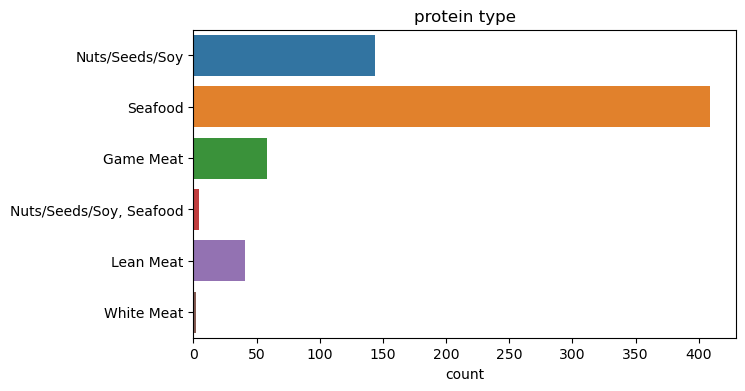

In [82]:
# Plot: 

protein_sources_filter_new = nutrition.query("`protein source new?` == True")
f, ax = plt.subplots(figsize=(7, 4))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='protein_type_new', ax=ax, data=protein_sources_filter_new)
ax.set_title('protein type')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

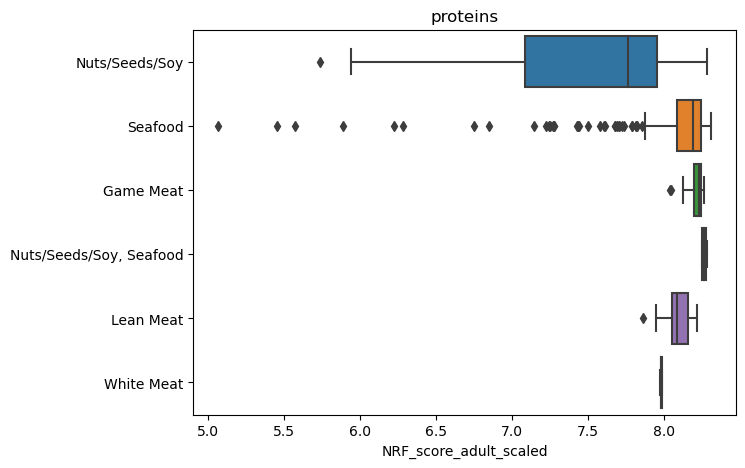

In [83]:
# Plot: 
protein_sources_filter_new = nutrition.query("`protein source new?` == True")
f, ax = plt.subplots(figsize=(7, 5))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='protein_type_new', x='NRF_score_adult_scaled', ax=ax, data=protein_sources_filter_new)
ax.set_title('proteins')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

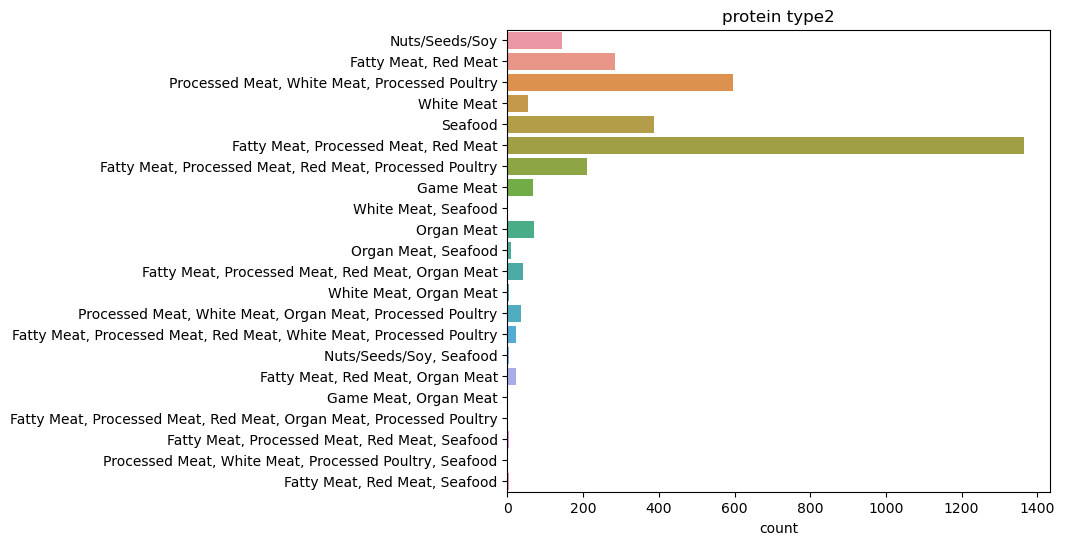

In [87]:
# Plot: 

protein_sources_filter_new2 = nutrition.query("`protein source new2?` == True")
f, ax = plt.subplots(figsize=(7, 6))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='protein_type_new2', ax=ax, data=protein_sources_filter_new2)
ax.set_title('protein type2')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show()

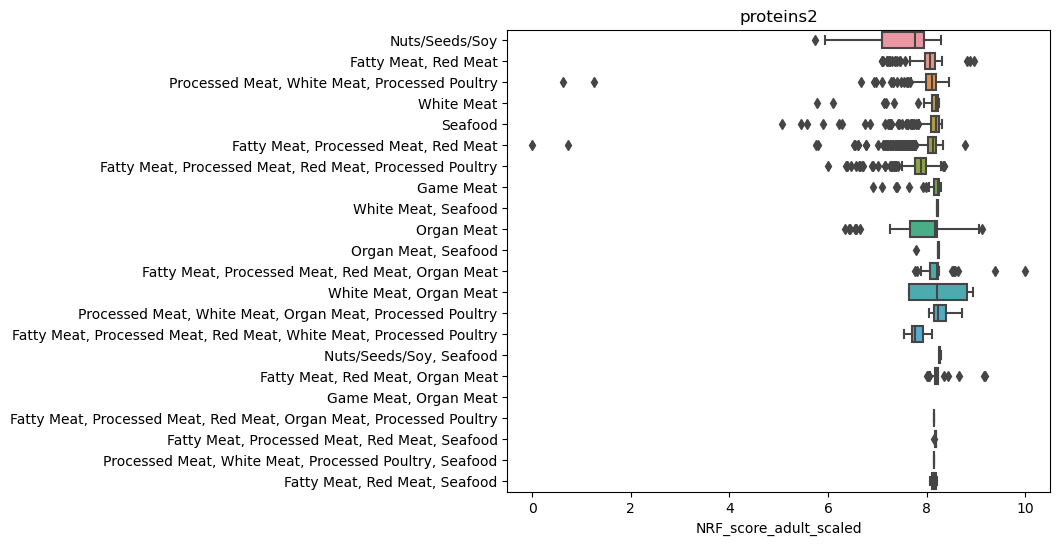

In [89]:
# Plot: 
protein_sources_filter_new2 = nutrition.query("`protein source new2?` == True")
f, ax = plt.subplots(figsize=(7, 6))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='protein_type_new2', x='NRF_score_adult_scaled', ax=ax, data=protein_sources_filter_new2)
ax.set_title('proteins2')
ax.set_ylabel('', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

## Categorization of foods into groups and subgroups
regex will be used to find keywords in `name` and categorize into 5 food groups defined by USDA: Fruit, Vegetables, Grain, Protein, Dairy. there will be 5 `food_group` columns and within each group there will be several columns for each subgroup. These columns  will contain boolean True or False depending on whether `name` contains the keyword from its category. afterward, we can use these boolean values to compile them into more intuitive category names in `food_group` and `subgroup` columns.  

breakdown:   
Fruit group  
- Fruit  
- Fruit Juice     

Vegetable group  
- Dark green vegetables   
- Red/Orange vegetables  
- Beans/Peas  
- Starchy vegetables  
- Other vegetables  

Grain group  
- Whole grain  
- Refined grain  

Protein group  
- Meat/poultry/eggs  
- Seafood  
- Nuts/seeds/soy  

Dairy group  
- Milk/yogurt  
- Cheese  

In [22]:
# convert `name` to lowercase so searches aren't case-sensitive
nutrition['name'] = nutrition['name'].str.lower()

#### add columns for `contains_fruit_group` and its subgroups

In [23]:
import re   # import re for regex
# define a regex pattern for common fruits
fruit_pattern = re.compile(r'(apple|banana|orange|strawberry|blueberry|raspberry|grape|kiwi|mango|pineapple|pear|peach|plum|cherry|watermelon|cantaloupe|lemon|lime|grapefruit|pomegranate|apricot|fig|coconut|avocado|blackberry|cranberry|date|elderberry|guava|kiwifruit|lychee|papaya|passion\sfruit|tangerine)')
# define a regex pattern for fruit juices
fruit_juice_pattern = re.compile(r'(apple\sjuice|orange\sjuice|grape\sjuice|pineapple\sjuice|lemon\sjuice|lime\sjuice|mango\sjuice|papaya\sjuice|guava\sjuice|strawberry\sjuice|blueberry\sjuice|raspberry\sjuice|blackberry\sjuice|cranberry\sjuice|cherry\sjuice|peach\sjuice|pear\sjuice|grapefruit\sjuice|pomegranate\sjuice|kiwi\sjuice|watermelon\sjuice)')

# define the function to categorize the fruit group
def contains_fruit_group(item):
    if fruit_pattern.search(item) or fruit_juice_pattern.search(item):  # if `name` contains one of the common fruits or fruit juices
        return True
    else:  
        return False

# define function to categorize the fruit subgroup
def contains_fruit(item):
    if fruit_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the fruit juice subgroup
def contains_fruit_juice(item):
    if fruit_juice_pattern.search(item):
        return True
    else:
        return False

# apply to `name` and create new columns with results
nutrition['contains_fruit_group'] = nutrition['name'].apply(contains_fruit_group)
nutrition['contains_fruit'] = nutrition['name'].apply(contains_fruit)
nutrition['contains_fruit_juice'] = nutrition['name'].apply(contains_fruit_juice)

#### add columns for `contains_vegetable_group` and its subgroups

In [24]:
# define regex patterns for different vegetable subgroups
#dark_green_vegetables_pattern = re.compile(r'(spinach|kale|collard\sgreens|mustard\sgreens|swiss\schard|turnip\sgreens|seaweed|bok\schoy|broccoli|rabe|arugula|watercress)')
dark_green_vegetables_pattern = re.compile(r'(?i)(amaranth\sleaves|arugula\s\(rocket\)|basil|beet\sgreens|bitter\smelon\sleaves|bok\schoy|broccoli|broccoli\srabe\s\(rapini\)|broccolini|chamnamul|chard|chrysanthemum\sleaves|cilantro|collard\sgreens|cress|dandelion\sgreens|dark-green\sleafy\slettuce|endive|escarole|kale|lambsquarters|mesclun|mixed\sgreens|mustard\sgreens|nettles|poke\sgreens|romaine\slettuce|spinach|Swiss\schard|taro\sleaves|turnip\sgreens|watercress)')
#red_orange_vegetables_pattern = re.compile(r'(carrot|pumpkin|sweet\spotato|red\spepper|orange\spepper|butternut\ssquash|acorn\ssquash|tomato|beet|red\sonion)')
red_orange_vegetables_pattern = re.compile(r'(?i)(acorn\ssquash|butternut\ssquash|calabaza|carrots|hubbard\ssquash|kabocha\ssquash|pimento|pimiento|pumpkin|red\sand\sorange\sbell\speppers|red\schili\speppers|red\speppers,\ssweet|sweet\spotatoes|tomatoes|100%\svegetable\sjuice|winter\ssquash)')
#beans_peas_pattern = re.compile(r'(black\sbeans|kidney\sbeans|pinto\sbeans|navy\sbeans|chickpeas|lentils|split\speas|green\speas|black-eyed\speas|lima\sbeans)')
beans_peas_pattern = re.compile(r'(?i)(bayo\sbeans|bean\sburgers?|black\sbeans|black-eyed\speas\s\(mature,\sdry\)|brown\sbeans|chickpeas\s\(garbanzo\sbeans\)|cow\speas|edamame\s\(young\soybeans\)|falafel\s\(spiced,\smashed\schickpeas\)|fava\sbeans\s\(broad\sbeans\)|hummus\s\(chickpea\sspread\)|kidney\sbeans|lentils|lima\sbeans\s\(mature\)|mung\sbeans|navy\sbeans|pigeon\speas|pink\sbeans|pinto\sbeans|soy\sbeans|split\speas|white\sbeans)')
#starchy_vegetables_pattern = re.compile(r'(potato|corn|green\speas|butternut\ssquash|acorn\ssquash|pumpkin|plantain|yam|taro|cassava)')
starchy_vegetables_pattern = re.compile(r'(?i)(breadfruit|burdock\sroot|cassava|corn|fufu|green\sbananas|green\slima\sbeans|green\speas|hominy|jicama|lotus\sroot|parsnips|plantains|potatoes,\swhite|salsify|tapioca|taro\sroot\s\(dasheen\sor\syautia\)|water\schestnuts|yams|yuca)')
#other_vegetables_pattern = re.compile(r'(cucumber|bell\spepper|zucchini|squash|eggplant|lettuce|celery|cabbage|brussels\ssprouts|cauliflower|artichoke|asparagus|radish)')
other_vegetables_pattern = re.compile(r'(?i)(alfalfa\ssprouts|arrowroot|artichokes|asparagus|avocado|bamboo\sshoots|bean\ssprouts|beets|bitter\smelon\s\(bitter\sgourd,\sbalsam\spear\)|broccoflower|Brussels\ssprouts|cabbage|cactus\spads\s\(nopales\)|cauliflower|celeriac|celery|chayote\s\(mirliton\)|chives|cucumbers|daikon|drumstick\spods\s\(moringa\)|eggplant|fennel\sbulb|fiddlehead\sferns|garlic|ginger\sroot|green\speppers|green\sbeans|hearts\sof\spalm|Jerusalem\sartichokes\s\(sunchokes\)|jute|kohlrabi|leeks|lettuce,\siceberg|luffa\s\(Chinese\sokra\)|mushrooms|okra|onions|pattypan\ssquash|purslane|raddicchio|radishes|red\scabbage|rutabaga|seaweed|scallions|snow\speas|sorrel|spaghetti\ssquash|tomatillos|turnips|wax\sbeans|yellow\ssquash|zucchini)')


# define the function to categorize the vegetable group
def contains_vegetable_group(item):
    if dark_green_vegetables_pattern.search(item) or red_orange_vegetables_pattern.search(item) or beans_peas_pattern.search(item) or starchy_vegetables_pattern.search(item) or other_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the dark green vegetables subgroup
def contains_dark_green_vegetables(item):
    if dark_green_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the red/orange vegetables subgroup
def contains_red_orange_vegetables(item):
    if red_orange_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the beans/peas subgroup
def contains_beans_peas(item):
    if beans_peas_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the starchy vegetables subgroup
def contains_starchy_vegetables(item):
    if starchy_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the other vegetables subgroup
def contains_other_vegetables(item):
    if other_vegetables_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and create new columns with results
nutrition['contains_vegetable_group'] = nutrition['name'].apply(contains_vegetable_group)
nutrition['contains_dark_green_vegetables'] = nutrition['name'].apply(contains_dark_green_vegetables)
nutrition['contains_red_orange_vegetables'] = nutrition['name'].apply(contains_red_orange_vegetables)
nutrition['contains_beans_peas'] = nutrition['name'].apply(contains_beans_peas)
nutrition['contains_starchy_vegetables'] = nutrition['name'].apply(contains_starchy_vegetables)
nutrition['contains_other_vegetables'] = nutrition['name'].apply(contains_other_vegetables)

#### add `contains_grain_group` column

In [25]:
# define regex patterns for grain subgroups
#whole_grain_pattern = re.compile(r'(whole\swheat\sbread|brown\srice|popcorn|oatmeal|quinoa|wild\srice|bulgur|buckwheat|barley|millets|sorghum|whole\srice|whole\swheat\spasta|whole\swheat\tortillas|rye\sbread|whole\swheat\sbagels|spelt|amaranth|teff|triticale|whole\swheat\senglish\smuffins|whole\swheat\spretzels)')
whole_grain_pattern = re.compile(r'(?i)(amaranth|barley\s\(not\spearled\)|brown\srice|buckwheat|bulgur\s\(cracked\s\wheat\)|dark\srye|injera|kamut|millet|muesli|oatmeal|oats|popcorn|quinoa|rolled\soats|sorghum|spelt|teff|triticale|whole\sgrain\sbarley|whole\sgrain\scornmeal|whole\sgrain\ssorghum|whole\srye|whole\swheat\sbread|whole\swheat\scereal\sflakes|whole\swheat\schapati|whole\swheat\scrackers|whole\swheat\spasta|whole\swheat\ssandwich\sbuns\sand\srolls|whole\swheat\stortillas|wild\srice)')
#refined_grain_pattern = re.compile(r'(white\sbread|white\srice|pretzels|english\smuffins|corn\stortilla|grits|regular\spasta|bagels|crackers|noodles|pancakes|waffles|white\sflour\stortillas|croissants|pita\sbread|refined\scereal|refined\swheat\sflour|refined\soat\sproducts|refined\sbarley\sproducts|refined\scorn\sproducts)')
refined_grain_pattern = re.compile(r'(?i)(bagels|biscuits|breadcrumbs|cakes|challah\sbread|cookies|corn\sflakes|corn\stortillas|cornbread|couscous|crackers,\ssaltine|cream\sof\srice|cream\sof\swheat|English\smuffins|flour\stortilla|French\sbread|grits|masa|matzo|naan|noodles|pancakes|pasta\s\(spaghetti,\smacaroni\)|pie/pastry\scrusts|pita\sbread|pizza\scrust|polenta|pretzels|ramen\snoodles|refined-grain\scereals|refined-grain\scrackers|rice\scakes|rice\spaper\s\(spring\sroll\swrappers\)|rice\svermicelli|waffles|white\sbread|white\srice|white\ssandwich\sbuns\sand\srolls)')


# define the function to categorize the grain group
def contains_grain_group(item):
    if whole_grain_pattern.search(item) or refined_grain_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the whole grain subgroup
def contains_whole_grain(item):
    if whole_grain_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the refined grain subgroup
def contains_refined_grain(item):
    if refined_grain_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['contains_grain_group'] = nutrition['name'].apply(contains_grain_group)
nutrition['contains_whole_grain'] = nutrition['name'].apply(contains_whole_grain)
nutrition['contains_refined_grain'] = nutrition['name'].apply(contains_refined_grain)

#### add `contains_protein_group` column

In [26]:
# define regex patterns for different protein subgroups
#seafood_pattern = re.compile(r'(fish|shark|tuna|salmon|trout|mackerel|sardine|anchovy|cod|tilapia|halibut|catfish|snapper|swordfish|bass|grouper|perch|sole|flounder|crab|lobster|shrimp|prawn|clam|oyster|mussel|scallop|squid|octopus|crayfish|eel)')
#meat_poultry_eggs_pattern = re.compile(r'(beef|pork|chicken|lamb|turkey|veal|venison|bison|duck|goose|rabbit|quail|pheasant|ostrich|elk|kangaroo|boar|horse|emu|camel|goat|alligator|turtle|frog|snail|crayfish|muskrat|raccoon|possum|armadillo|skunk|beaver|woodchuck|buffalo|moose|caribou|guinea\spig|pigeon|partridge|grouse|cornish\shen|turducken|goose\s?egg|duck\s?egg|chicken\s?egg|quail\s?egg|ostrich\s?egg|emu\s?egg)')
#nuts_seeds_soy_pattern = re.compile(r'(almond|cashew|pecan|walnut|peanut|hazelnut|macadamia|pine\snut|pistachio|sunflower\sseeds|pumpkin\sseeds|flaxseeds|chia\sseeds|hemp\sseeds|sesame\sseeds|soybean|soy\sproducts|tofu|tempeh)')

meats_pattern = re.compile(r'(?i)(Lean\sCuts|beef|goat|ham|lamb|pork|Lean\sGround\sMeats|beef|pork|Lean\sLuncheon/\sDeli\sMeats|beef|chicken|ham|pork|turkey|Game\sMeats|bear|bison|deer|elk|moose|opossum|rabbit|raccoon|squirrel|venison|Organ\sMeats|brain|chitterlings|giblets|gizzard|heart|kidney|liver|stomach|sweetbreads|tongue|tripe)')

poultry_pattern = re.compile(r'(?i)(chicken|Cornish\shen|dove|duck|goose|ostrich|pheasant|quail|turkey)')

nuts_seeds_soy_pattern = re.compile(r'(?i)(almonds|almond\sbutter|Brazil\snuts|cashew\sbutter|cashews|chestnuts|chia\sseeds|flax\sseeds|hazelnuts\s\(filberts\)|macadamia\snuts|mixed\snuts|peanut\sbutter|peanuts|pecans|pine\snuts|pistachios|pumpkin\sseeds|sesame\sbutter\sor\spaste\s\(tahini\)|sesame\sseeds|sunflower\sbutter|sunflower\sseeds|tempeh|texturized\svegetable\sprotein\s\(TVP\)|tofu\s\(made\sfrom\ssoybeans\)|veggie\sburgers\s\(made\sfrom\ssoybeans\)|walnuts)')

seafood_pattern = re.compile(r'(?i)(fish|shark|tuna|salmon|trout|mackerel|sardine|anchovy|cod|tilapia|halibut|catfish|snapper|swordfish|bass|grouper|perch|sole|flounder|crab|lobster|shrimp|prawn|clam|oyster|mussel|scallop|squid|octopus|crayfish|eel|Finfish|black\ssea\sbass|catfish|cod|flounder|freshwater\strout|haddock|hake|halibut|herring|light\stuna|mackerel|mullet|perch|pollock|salmon|sea\sbass|snapper|sole|sushi|tilapia|whiting|Shellfish|clams|crab|crayfish|lobster|mussels|octopus|oysters|scallops|shrimp|squid\s\(calamari\)|Canned\sFish|anchovies|freshwater\strout|herring|light\stuna|salmon|sardines)')

eggs_pattern = re.compile(r'(?i)(chicken\seggs|duck\seggs|egg\sproducts|quail\seggs|goose\seggs|turkey\seggs)')


# define the function to categorize the protein group
def contains_protein_group(item):
    #if seafood_pattern.search(item) or meat_poultry_eggs_pattern.search(item) or nuts_seeds_soy_pattern.search(item):
    if meats_pattern.search(item) or poultry_pattern.search(item) or nuts_seeds_soy_pattern.search(item) or seafood_pattern.search(item) or eggs_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the meat/poultry/eggs subgroup
# define function to categorize the meats subgroup
def contains_meat(item):
    #if meat_poultry_eggs_pattern.search(item):
    if meats_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the poultry subgroup
def contains_poultry(item):
    if poultry_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the nuts/seeds/soy subgroup
def contains_nuts_seeds_soy(item):
    if nuts_seeds_soy_pattern.search(item):
        return True
    else:
        return False


# define function to categorize the seafood subgroup
def contains_seafood(item):
    if seafood_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the eggs subgroup
def contains_eggs(item):
    if eggs_pattern.search(item):
        return True
    else:
        return False


# apply the functions to `name` and new columns to store results
nutrition['contains_protein_group'] = nutrition['name'].apply(contains_protein_group)
#nutrition['contains_meat_poultry_eggs'] = nutrition['name'].apply(contains_meat_poultry_eggs)
nutrition['contains_meat'] = nutrition['name'].apply(contains_meat)
nutrition['contains_poultry'] = nutrition['name'].apply(contains_poultry)
nutrition['contains_nuts_seeds_soy'] = nutrition['name'].apply(contains_nuts_seeds_soy)
nutrition['contains_seafood'] = nutrition['name'].apply(contains_seafood)
nutrition['contains_eggs'] = nutrition['name'].apply(contains_eggs)



#### add `contains_dairy_group` column

In [27]:
# define regex patterns for dairy subgroups
milk_yogurt_pattern = re.compile(
    r'\b(whole milk|skimmed milk|semi-skimmed milk|2% milk|1% milk|fat-free milk|lactose-free milk|almond milk|soy milk|oat milk|rice milk|coconut milk|goat milk|buffalo milk|'
    r'\b(whole milk|skimmed milk|semi-skimmed milk|2% milk|1% milk|fat-free milk|lactose-free milk|almond milk|soy milk|oat milk|rice milk|coconut milk|goat milk|buffalo milk) (vanilla|chocolate|strawberry|mint chocolate chip|cookies and cream|rocky road|butter pecan|coffee|pistachio|cookie dough|caramel|fudge|neapolitan|cherry|raspberry|blackberry|blueberry|lemon|orange|sherbet|sorbet|) ice cream|sherbet\b'
    r'yogurt|greek yogurt|plain yogurt|flavored yogurt|low-fat yogurt|full-fat yogurt|non-fat yogurt|probiotic yogurt|fruit yogurt|'
    r'infant formula|baby formula|toddler formula|formula milk|soy formula|lactose-free formula|hydrolyzed formula|hypoallergenic formula|organic baby formula|iron-fortified formula|goat milk formula)\b')

milk_pattern = re.compile(
    r'\b(whole milk|skimmed milk|semi-skimmed milk|2% milk|1% milk|fat-free milk|lactose-free milk|almond milk|soy milk|oat milk|rice milk|coconut milk|goat milk|buffalo milk)'
    r'(vanilla|chocolate|strawberry|mint chocolate chip|cookies and cream|rocky road|butter pecan|coffee|pistachio|cookie dough|caramel|fudge|neapolitan|cherry|raspberry|blackberry|blueberry|lemon|orange|sherbet|sorbet|) ice cream|sherbet\b')
yogurt_pattern = re.compile(r'yogurt|greek yogurt|plain yogurt|flavored yogurt|low-fat yogurt|full-fat yogurt|non-fat yogurt|probiotic yogurt|fruit yogurt|')
cheese_pattern = re.compile(r'\b(cheddar|gouda|brie|camembert|mozzarella|parmesan|feta|blue cheese|gorgonzola|roquefort|emmental|swiss cheese|monterey jack|provolone|ricotta|cottage cheese|cream cheese|colby|edam|goat cheese|pepper jack|asiago|manchego|halloumi|havarti|stilton)\b')


# define the function to categorize the dairy group
def contains_dairy_group(item):
    if milk_yogurt_pattern.search(item) or milk_pattern.search(item) or yogurt_pattern.search(item) or cheese_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the milk subgroup
def contains_milk(item):
    if milk_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the yogurt subgroup
def contains_yogurt(item):
    if yogurt_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the cheese subgroup
def contains_cheese(item):
    if cheese_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['contains_dairy_group'] = nutrition['name'].apply(contains_dairy_group)
nutrition['contains_milk'] = nutrition['name'].apply(contains_milk)
nutrition['contains_yogurt'] = nutrition['name'].apply(contains_yogurt)
nutrition['contains_cheese'] = nutrition['name'].apply(contains_cheese)

In [28]:
# sub-subcategories
#milk_pattern = re.compile(Cow's Milk|Whole Milk|2% Milk|1% Milk|Skim Milk
cows_milk_pattern = re.compile(r"(cow's milk|cow milk|cows milk|whole milk|2% milk|1% milk|skim milk)")
goat_milk_pattern = re.compile(r"(goat's milk|goat milk|goats milk)")
sheep_milk_pattern = re.compile(r"(sheep's milk|sheep milk|sheeps milk)")
buffalo_milk_pattern = re.compile(r"(buffalo's milk|buffalo milk|buffalos milk)")
camel_milk_pattern = re.compile(r"(camel's milk|camel milk|camels milk)")
horse_milk_pattern = re.compile(r"horse's milk|horse milk|horses milk")
donkey_milk_pattern = re.compile(r"donkey's milk|donkey milk|donkeys milk")
almond_milk_pattern = re.compile(r'(almond milk|unsweetened almond milk)')
soy_milk_pattern = re.compile(r'(soy milk|unsweetened soy milk)')
rice_milk_pattern = re.compile(r'(rice milk|unsweetened rice milk)')
oat_milk_pattern = re.compile(r'(oat milk|unsweetened oat milk)')
coconut_milk_pattern = re.compile(r'(coconut milk|light coconut milk)')
cashew_milk_pattern = re.compile(r'(cashew milk|unsweetened cashew milk)')
hemp_milk_pattern = re.compile(r'(hemp milk|unsweetened hemp milk)')
flax_milk_pattern = re.compile(r'(flax milk|unsweetened flax milk)')
pea_milk_pattern = re.compile(r'pea milk')
macadamia_milk_pattern = re.compile(r'(macadamia milk|unsweetened macadamia milk)')
hazelnut_milk_pattern = re.compile(r'hazelnut milk')
walnut_milk_pattern = re.compile(r'walnut milk')
quinoa_milk_pattern = re.compile(r'quinoa milk')
spelt_milk_pattern = re.compile(r'spelt milk')
tiger_nut_milk_pattern = re.compile(r'tiger nut milk')
pistachio_milk_pattern = re.compile(r'pistachio milk')
amaranth_milk_pattern = re.compile(r'amaranth milk')
barley_milk_pattern = re.compile(r'barley milk')

ice_cream_pattern = re.compile(r'(vanilla|chocolate|strawberry|mint chocolate chip|cookies and cream|rocky road|butter pecan|coffee|pistachio|cookie dough|caramel|fudge|neapolitan|cherry|raspberry|blackberry|blueberry|lemon|orange|sherbet|sorbet|) ice cream|sherbet\b')

plain_yogurt_pattern = re.compile(r'plain yogurt')
greek_yogurt_pattern = re.compile(r'greek yogurt')
icelandic_yogurt_pattern = re.compile(r'(icelandic yogurt|skyr)')
australian_yogurt_pattern = re.compile(r'australian yogurt')
soy_yogurt_pattern = re.compile(r'soy yogurt')
almond_yogurt_pattern = re.compile(r'almond yogurt')
coconut_yogurt_pattern = re.compile(r'coconut yogurt')
oat_yogurt_pattern = re.compile(r'oat yogurt')
flavored_yogurt_pattern = re.compile(r'(flavored yogurt|strawberry yogurt|blueberry yogurt|vanilla yogurt|peach yogurt)')
low_fat_yogurt_pattern = re.compile(r'low-fat yogurt')
non_fat_yogurt_pattern = re.compile(r'non-fat yogurt')
full_fat_yogurt_pattern = re.compile(r'full-fat yogurt')
lactose_free_yogurt_pattern = re.compile(r'lactose-free yogurt')
probiotic_yogurt_pattern = re.compile(r'probiotic yogurt')
bulgarian_yogurt_pattern = re.compile(r'bulgarian yogurt')
indian_yogurt_pattern = re.compile(r'(indian yogurt|dahi)')
turkish_yogurt_pattern = re.compile(r'turkish yogurt')


cheddar_cheese_pattern = re.compile(r'cheddar cheese|cheddar|cheese, cheddar')
mozzarella_cheese_pattern = re.compile(r'mozzarella cheese')
parmesan_cheese_pattern = re.compile(r'parmesan cheese')
gouda_cheese_pattern = re.compile(r'gouda cheese')
brie_cheese_pattern = re.compile(r'brie cheese')
camembert_cheese_pattern = re.compile(r'camembert cheese')
blue_cheese_pattern = re.compile(r'(blue cheese|gorgonzola|roquefort|stilton)')
feta_cheese_pattern = re.compile(r'feta cheese')
ricotta_cheese_pattern = re.compile(r'ricotta cheese')
goat_cheese_pattern = re.compile(r'(goat cheese|chevre)')
swiss_cheese_pattern = re.compile(r'swiss cheese')
gorgonzola_cheese_pattern = re.compile(r'gorgonzola cheese')
havarti_cheese_pattern = re.compile(r'havarti cheese')
monterey_jack_cheese_pattern = re.compile(r'monterey jack cheese')
pecorino_cheese_pattern = re.compile(r'pecorino cheese')
manchego_cheese_pattern = re.compile(r'manchego cheese')
asiago_cheese_pattern = re.compile(r'asiago cheese')
halloumi_cheese_pattern = re.compile(r'halloumi cheese')
provolone_cheese_pattern = re.compile(r'provolone cheese|provolone|cheese, provolone')
emmental_cheese_pattern = re.compile(r'emmental cheese')




In [29]:
# 
fast_food_pattern = re.compile(r"mcdonalds|mcdonald's|burger king|kfc|kentucky fried chicken|subway|taco bell|wendys|wendy's|dominos|domino's pizza|pizza hut|starbucks|dunkin|dunkin' donuts|dunkin' doughnuts|chick-fil-a|chick fil a|chickfila|five guys|chipotle|panda express|little caesars|sonic|arbys|arby's|jack in the box|whataburger|in-n-out|in n out|innout")
mcdonalds_pattern = re.compile(r"mcdonalds|mcdonald's")
burger_king_pattern = re.compile(r'burger king')
kfc_pattern = re.compile(r'kfc|kentucky fried chicken')
subway_pattern = re.compile(r'subway')
taco_bell_pattern = re.compile(r'taco bell')
wendys_pattern = re.compile(r"wendys|wendy's")
dominos_pattern = re.compile(r"dominos|domino's pizza")
pizza_hut_pattern = re.compile(r'pizza hut')
starbucks_pattern = re.compile(r'starbucks')
dunkin_pattern = re.compile(r"dunkin|dunkin' donuts|dunkin' doughnuts")
chick_fil_a_pattern = re.compile(r'chick-fil-a|chick fil a|chickfila')
five_guys_pattern = re.compile(r'five guys')
chipotle_pattern = re.compile(r'chipotle')
panda_express_pattern = re.compile(r'panda express')
little_caesars_pattern = re.compile(r'little caesars')
sonic_pattern = re.compile(r'sonic')
arbys_pattern = re.compile(r"arbys|arby's")
jack_in_the_box_pattern = re.compile(r'jack in the box')
whataburger_pattern = re.compile(r'whataburger')
in_n_out_pattern = re.compile(r'in-n-out|in n out|innout')

# define the function to categorize the dairy group
def contains_fast_food(item):
    if fast_food_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['fast food?'] = nutrition['name'].apply(contains_fast_food)

### Create `food_group` column to compile all food group categories into one column
food group can be one of three categories:  
1. single-group (`name` contains food from only one group)  
2. dual-group (`name` contains food from two groups)  
3. triple-group (`name` contains food from 3 groups)  

In [30]:
# Define funtion which categorizes items from the boolean columns
def food_group(item):
    groups = []    # initialize an empty list

    # for each group, check if the item belongs to it, adding its name to the list if so
    if contains_fruit_group(item):
        groups.append('Fruit')
    elif contains_vegetable_group(item):
        groups.append('Vegetable')
    elif contains_grain_group(item):
        groups.append('Grain')
    elif contains_protein_group(item):
        groups.append('Protein')
    elif contains_dairy_group(item):
        groups.append('Dairy')

    # join group names from the list into a string separated by commas
    group_string = ', '.join(groups)

    # return the appropriate string based on the number of groups
    if not group_string:    # if no items were found
        return 'None'
    elif len(groups) > 3:   # if more than 3 names
        return '4+'
    else:                   # if 3 or fewer items were found and they are in group_string
        return group_string
        
# apply function to `name` and store result in new column
nutrition['food_group'] = nutrition['name'].apply(food_group)
nutrition.head()

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_poultry,contains_nuts_seeds_soy,contains_seafood,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group
0,0,cornstarch,100,381,0.1,NaN,0,9.0,0.4,0.0,...,False,False,False,False,True,False,True,False,False,Vegetable
1,1,"nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,...,False,True,False,False,True,False,True,False,False,Protein
2,2,"eggplant, raw",100,25,0.2,NaN,0,2.0,6.9,22.0,...,False,False,False,False,True,False,True,False,False,Vegetable
3,3,"teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,...,False,False,False,False,True,False,True,False,False,Grain
4,4,"sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,...,False,False,False,False,True,True,True,False,False,Fruit


In [31]:
nutrition.query("food_group == 'Fruit'")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_poultry,contains_nuts_seeds_soy,contains_seafood,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group
4,4,"sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,...,False,False,False,False,True,True,True,False,False,Fruit
12,12,"mango nectar, canned",100,51,0.1,NaN,0,5.0,1.5,7.0,...,False,False,False,False,True,False,True,False,False,Fruit
16,16,"pie, lemon, fried pies",100,316,16.0,2.5,0,374.0,0.0,18.0,...,False,False,False,False,True,False,True,False,False,Fruit
20,20,"grapes, raw, muscadine",100,57,0.5,NaN,0,1.0,0.0,2.0,...,False,False,False,False,True,False,True,False,False,Fruit
45,45,"babyfood, pear, juice",100,47,0.0,0.0,0,8.0,2.6,4.0,...,False,False,False,False,True,False,True,False,False,Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,8550,"beverages, frozen concentrate. not manufacture...",100,172,0.5,0.1,0,24.0,0.0,30.0,...,False,False,False,False,True,False,True,False,False,Fruit
8620,8620,"ruby red grapefruit juice blend (grapefruit, g...",100,44,0.1,NaN,0,8.0,0.0,0.0,...,False,False,False,False,True,False,True,False,False,Fruit
8655,8655,"beverages, prepared with water, frozen concent...",100,45,0.0,0.0,0,10.0,0.0,0.0,...,False,False,False,False,True,False,True,False,False,Fruit
8662,8662,"apple juice, diluted with 3 volume water witho...",100,47,0.1,NaN,0,7.0,1.8,0.0,...,False,False,False,False,True,False,True,False,False,Fruit


### Create `subgroup` column to compile all food subgroup categories into one column
subgroups vary depending on what was found in this dataset (before additions are made to this data or use of this method on other data, additional categorization logic may need to be added)  
many items belong to multiple subgroups.  

In [32]:
# Define function which categorizes `name` items into subgroups
def subgroup(item):
    groups = [] # initialize empty list to store subgroups

    # check each main food group and its subgroups
    if contains_fruit_group(item): # add fruit subgroups
        if contains_fruit_juice(item):
            groups.append('Fruit Juice')
        elif contains_fruit(item):
            groups.append('Fruit')      # assign name "Fruit" if an item falls into fruit category

    if contains_vegetable_group(item): # add vegetable subgroups
        veg_subgroups = ['Dark Green Vegetables', 'Red/Orange Vegetables', 'Beans/Peas', 'Starchy Vegetables', 'Other Vegetables']
        veg_checks = [contains_dark_green_vegetables, contains_red_orange_vegetables, contains_beans_peas, contains_starchy_vegetables, contains_other_vegetables]
        for subgroup, check_func in zip(veg_subgroups, veg_checks):
            if check_func(item):
                groups.append(subgroup)

    if contains_grain_group(item): # add grain subgroups
        groups.append('Whole Grain' if contains_whole_grain(item) else '')
        groups.append('Refined Grain' if contains_refined_grain(item) else '')

    if contains_protein_group(item): # add protein subgroups
        protein_subgroups = ['Meat', 'Poultry', 'Nuts/Seeds/Soy', 'Seafood', 'Eggs']
        protein_checks = [contains_meat, contains_poultry, contains_nuts_seeds_soy, contains_seafood, contains_eggs]
        for subgroup, check_func in zip(protein_subgroups, protein_checks):
            if check_func(item):
                groups.append(subgroup)

    if contains_dairy_group(item): # add dairy subgroups
        groups.append('Milk/Yogurt' if contains_milk_yogurt(item) else '')
        groups.append('Cheese' if contains_cheese(item) else '')

    # Filter out empty strings and join the remaining groups
    groups = [g for g in groups if g]
    group_string = ', '.join(groups)

    # return the appropriate string based on the number of groups
    if not group_string:     # if no items were found
        return 'None'
    elif len(groups) >= 3:   # if more than 3 names
        return '3+'
    else:                    # if 3 or fewer items were found and they are in group_string
        return group_string
        
# apply function to `name` and store result in new column        
nutrition['subgroup'] = nutrition['name'].apply(subgroup)
nutrition.head()

NameError: name 'contains_milk_yogurt' is not defined

In [ ]:
nutrition.query("contains_fruit_group == True")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_nuts_seeds_soy,contains_seafood,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup
4,4,"sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,...,False,False,False,True,True,True,False,False,Fruit,Fruit
12,12,"mango nectar, canned",100,51,0.1,NaN,0,5.0,1.5,7.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit
16,16,"pie, lemon, fried pies",100,316,16.0,2.5,0,374.0,0.0,18.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit
20,20,"grapes, raw, muscadine",100,57,0.5,NaN,0,1.0,0.0,2.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit
45,45,"babyfood, pear, juice",100,47,0.0,0.0,0,8.0,2.6,4.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,8550,"beverages, frozen concentrate. not manufacture...",100,172,0.5,0.1,0,24.0,0.0,30.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit
8620,8620,"ruby red grapefruit juice blend (grapefruit, g...",100,44,0.1,NaN,0,8.0,0.0,0.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit Juice
8655,8655,"beverages, prepared with water, frozen concent...",100,45,0.0,0.0,0,10.0,0.0,0.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit
8662,8662,"apple juice, diluted with 3 volume water witho...",100,47,0.1,NaN,0,7.0,1.8,0.0,...,False,False,False,True,False,True,False,False,Fruit,Fruit Juice


# categorizing sub-subgroups
def dairy_variety(item):
    dairy_subgroups = {
        'Milk': milk_pattern,
        'Yogurt': yogurt_pattern,
        'Cheese': cheese_pattern
    }
    varieties = []

    for subgroup, pattern in dairy_subgroups.items():
        if pattern.search(item):
            varieties.append(subgroup)

    return ', '.join(varieties) if varieties else 'None'

# Example usage in DataFrame
df['variety'] = df['name'].apply(dairy_variety)


In [ ]:
def dairy_variety(item):
    dairy_varieties = {
        'Cow Milk': cows_milk_pattern, 
        'Goat Milk': goat_milk_pattern,
        'Sheep Milk': sheep_milk_pattern,
        'Buffalo Milk': buffalo_milk_pattern,
        'Camel Milk': camel_milk_pattern,
        'Horse Milk': horse_milk_pattern,
        'Donkey Milk': donkey_milk_pattern,
        'Almond Milk': almond_milk_pattern,
        'Soy Milk': soy_milk_pattern,
        'Rice Milk': rice_milk_pattern, 
        'Oat Milk': oat_milk_pattern,
        'Coconut Milk': coconut_milk_pattern,
        'Cashew Milk': cashew_milk_pattern,
        'Hemp Milk': hemp_milk_pattern,
        'Flax Milk': flax_milk_pattern,
        'Pea Milk': pea_milk_pattern,
        'Macadamia Milk': macadamia_milk_pattern,  
        'Hazelnut Milk': hazelnut_milk_pattern,
        'Walnut Milk': walnut_milk_pattern, 
        'Quinoa Milk': quinoa_milk_pattern,
        'Spelt Milk': spelt_milk_pattern,
        'Tiger Nut Milk': tiger_nut_milk_pattern,
        'Pistachio Milk': pistachio_milk_pattern,
        'Amaranth Milk': amaranth_milk_pattern,
        'Barley Milk': barley_milk_pattern,
        'Ice Cream': ice_cream_pattern,
        'Plain Yogurt': plain_yogurt_pattern, 
        'Greek Yogurt': greek_yogurt_pattern,
        'Icelandic Yogurt': icelandic_yogurt_pattern,
        'Australian Yogurt': australian_yogurt_pattern,
        'Soy Yogurt': soy_yogurt_pattern,
        'Almond Yogurt': almond_yogurt_pattern,
        'Coconut Yogurt': coconut_yogurt_pattern,
        'Oat Yogurt': oat_yogurt_pattern,
        'Flavored Yogurt': flavored_yogurt_pattern,
        'Low-Fat Yogurt': low_fat_yogurt_pattern,
        'Non-Fat Yogurt': non_fat_yogurt_pattern,
        'Full-Fat Yogurt': full_fat_yogurt_pattern,
        'Lactose-Free Yogurt': lactose_free_yogurt_pattern,
        'Probiotic Yogurt': probiotic_yogurt_pattern,
        'Bulgarian Yogurt': bulgarian_yogurt_pattern,
        'Indian Yogurt': indian_yogurt_pattern,
        'Turkish Yogurt': turkish_yogurt_pattern,
        'Cheddar Cheese': cheddar_cheese_pattern,
        'Mozzarella Cheese': mozzarella_cheese_pattern,
        'Parmesan Cheese': parmesan_cheese_pattern,
        'Gouda Cheese': gouda_cheese_pattern,
        'Brie Cheese': brie_cheese_pattern,
        'Camembert Cheese': camembert_cheese_pattern,
        'Blue Cheese': blue_cheese_pattern, 
        'Feta Cheese': feta_cheese_pattern,
        'Ricotta Cheese': ricotta_cheese_pattern,
        'Goat Cheese': goat_cheese_pattern,
        'Swiss Cheese': swiss_cheese_pattern,
        'Gorgonzola Cheese': gorgonzola_cheese_pattern,
        'Havarti Cheese': havarti_cheese_pattern,
        'Monterey Jack': monterey_jack_cheese_pattern,
        'Pecorino Cheese': pecorino_cheese_pattern,
        'Manchego Cheese': manchego_cheese_pattern,
        'Asiago Cheese': asiago_cheese_pattern,
        'Halloumi Cheese': halloumi_cheese_pattern,
        'Provolone Cheese': provolone_cheese_pattern,
        'Emmental Cheese': emmental_cheese_pattern
    }

    varieties = []

    for variety, pattern in dairy_varieties.items():
        if pattern.search(item):
            varieties.append(variety)

    return ', '.join(varieties) if varieties else 'None'

# Example usage in DataFrame
nutrition['variety'] = nutrition['name'].apply(dairy_variety)
nutrition.query("food_group == 'Dairy'")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_seafood,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup,variety
8,8,"cheese, camembert",100,300,24.0,15.0,72,842.0,15.4,62.0,...,False,False,True,False,True,True,False,Dairy,Cheese,None
9,9,vegetarian fillets,100,290,18.0,2.8,0,490.0,82.0,102.0,...,False,False,True,False,True,False,False,Dairy,None,None
10,10,"pace, picante sauce",100,25,0.0,0.0,0,781.0,0.0,0.0,...,False,False,True,False,True,False,False,Dairy,None,None
11,11,"goji berries, dried",100,349,0.4,NaN,0,298.0,0.0,0.0,...,False,False,True,False,True,False,False,Dairy,None,None
13,13,"crackers, rusk toast",100,407,7.2,1.4,78,253.0,0.0,87.0,...,False,False,True,False,True,False,False,Dairy,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,8767,"toddler formula, ready-to-feed, enfagrow premi...",100,64,3.6,1.6,1,25.0,8.0,11.0,...,False,False,True,False,True,False,False,Dairy,Milk/Yogurt,None
8770,8770,"infant formula, with ara and dha, sensitive (l...",100,68,3.7,2.4,2,21.0,11.1,10.0,...,False,False,True,False,True,False,False,Dairy,Milk/Yogurt,None
8771,8771,"infant formula, not reconstituted, liquid conc...",100,128,6.5,2.8,0,46.0,15.7,20.0,...,False,False,True,False,True,False,False,Dairy,Milk/Yogurt,None
8772,8772,"pan dulce, contains wheat flour and rice flour...",100,445,16.0,NaN,0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,Dairy,None,None


In [ ]:
mcdonalds_pattern = re.compile(r"mcdonalds|mcdonald's")
burger_king_pattern = re.compile(r'burger king')
kfc_pattern = re.compile(r'kfc|kentucky fried chicken')
subway_pattern = re.compile(r'subway')
taco_bell_pattern = re.compile(r'taco bell')
wendys_pattern = re.compile(r"wendys|wendy's")
dominos_pattern = re.compile(r"dominos|domino's pizza")
pizza_hut_pattern = re.compile(r'pizza hut')
starbucks_pattern = re.compile(r'starbucks')
dunkin_pattern = re.compile(r"dunkin|dunkin' donuts|dunkin' doughnuts")
chick_fil_a_pattern = re.compile(r'chick-fil-a|chick fil a|chickfila')
five_guys_pattern = re.compile(r'five guys')
chipotle_pattern = re.compile(r'chipotle')
panda_express_pattern = re.compile(r'panda express')
little_caesars_pattern = re.compile(r'little caesars')
sonic_pattern = re.compile(r'sonic')
arbys_pattern = re.compile(r"arbys|arby's")
jack_in_the_box_pattern = re.compile(r'jack in the box')
whataburger_pattern = re.compile(r'whataburger')
in_n_out_pattern = re.compile(r'in-n-out|in n out|innout')

def fast_food_chains(item):
    fast_food_chains = {
        'Mcdonalds': mcdonalds_pattern,
        'Burger King': burger_king_pattern,
        'KFC': kfc_pattern,
        'Subway': subway_pattern,
        'Taco Bell': taco_bell_pattern,
        "Wendys": wendys_pattern,
        'Dominos': dominos_pattern,
        'Pizza Hut': pizza_hut_pattern,
        'Starbucks': starbucks_pattern,
        "Dunkin Donuts": dunkin_pattern,
        'Chick fil A': chick_fil_a_pattern,
        'Five Guys': five_guys_pattern,
        'Chipotle': chipotle_pattern,
        'Panda Express': panda_express_pattern,
        'Little Caesars': little_caesars_pattern,
        'Sonic': sonic_pattern,
        'Arbys': arbys_pattern,
        'Jack In the Box': jack_in_the_box_pattern,
        'Whataburger': whataburger_pattern,
        'In-n-Out': in_n_out_pattern
    }

    chains = []

    for chain, pattern in fast_food_chains.items():
        if pattern.search(item):
            chains.append(chain)

    return ', '.join(chains) if chains else 'None'

nutrition['Fast Food Chain'] = nutrition['name'].apply(fast_food_chains)
nutrition.query("`fast food?` == True")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup,variety,Fast Food Chain
31,31,"mcdonald's, side salad",100,20,0.2,NaN,0,12.0,0.0,57.0,...,False,True,False,True,False,True,Dairy,None,None,Mcdonalds
34,34,"mcdonald's, hash brown",100,271,16.0,2.3,0,580.0,0.0,12.0,...,False,True,False,True,False,True,Dairy,None,None,Mcdonalds
62,62,"wendy's, french fries",100,301,14.0,2.8,0,219.0,33.0,0.0,...,False,True,False,True,False,True,Dairy,None,None,Wendys
83,83,"mcdonald's, hamburger",100,264,10.0,3.5,27,494.0,0.0,64.0,...,False,True,False,True,False,True,Protein,Meat,None,Mcdonalds
100,100,"taco bell, taco salad",100,170,9.2,3.0,19,363.0,0.0,43.0,...,False,True,False,True,False,True,Dairy,None,None,Taco Bell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,7380,"little caesars 14"" original round meat and veg...",100,243,11.0,4.6,31,578.0,0.0,0.0,...,False,True,False,True,False,True,Dairy,None,None,Little Caesars
7421,7421,"kfc, meat and skin with breading, drumstick, e...",100,274,18.0,3.9,109,632.0,0.0,0.0,...,False,True,False,True,False,True,Protein,"Meat, Poultry",None,KFC
7422,7422,"kfc, meat and skin with breading, breast, orig...",100,231,13.0,3.0,81,606.0,0.0,0.0,...,False,True,False,True,False,True,Protein,"Meat, Poultry",None,KFC
7525,7525,"subway, tomato and sweet onion sauce, sweet on...",100,155,2.4,0.5,22,305.0,0.0,58.0,...,False,True,False,True,False,True,Grain,3+,None,Subway


## Visualizing the newly-created food groups and subgroups

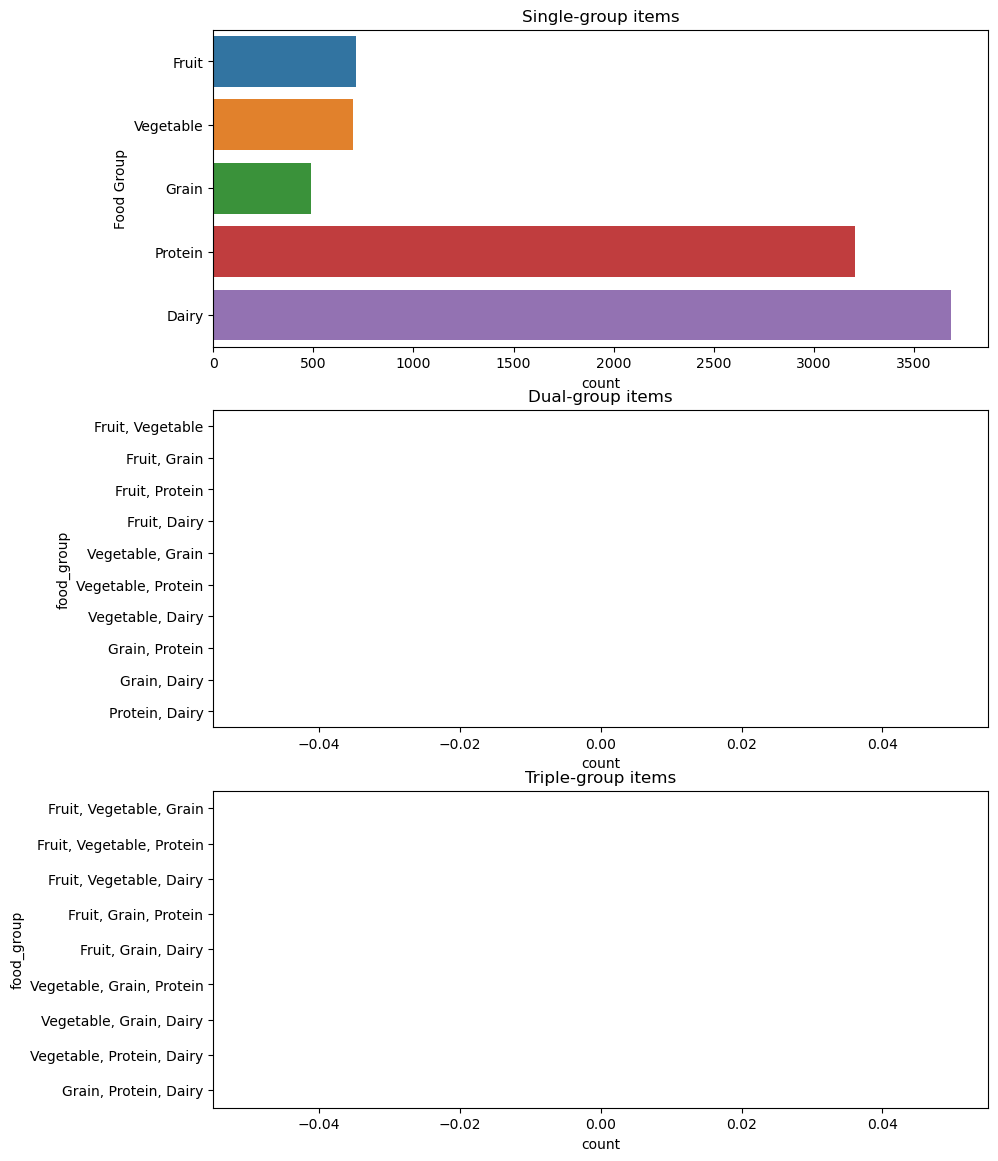

In [ ]:
# Plot: counts for each food group

# create a filtered dataframe and order for foods which only fall into one food group
single_group = nutrition.query("(food_group == 'Fruit') | (food_group == 'Vegetable') | (food_group == 'Grain') | (food_group == 'Protein') | (food_group == 'Dairy')")
single_order = ['Fruit', 'Vegetable', 'Grain', 'Protein', 'Dairy']

# create a filtered dataframe and order for foods which fall into two food groups
dual_group = nutrition.query(
    "(food_group == 'Fruit, Vegetable') |" 
    "(food_group == 'Fruit, Grain') |"
    "(food_group == 'Fruit, Protein') |" 
    "(food_group == 'Fruit, Dairy') |" 

    "(food_group == 'Vegetable, Grain') |" 
    "(food_group == 'Vegetable, Protein') |"
    "(food_group == 'Vegetable, Dairy') |" 

    "(food_group == 'Grain, Protein') |" 
    "(food_group == 'Grain, Dairy') |"

    "(food_group == 'Protein, Dairy')"

    )
dual_order = ['Fruit, Vegetable', 'Fruit, Grain', 'Fruit, Protein', 'Fruit, Dairy', 'Vegetable, Grain', 'Vegetable, Protein', 'Vegetable, Dairy', 'Grain, Protein', 'Grain, Dairy', 'Protein, Dairy']

# create a filtered dataframe and order for foods which fall into three food groups
triple_group = nutrition.query(
    "(food_group == 'Fruit, Vegetable, Grain') |" 
    "(food_group == 'Fruit, Vegetable, Protein') |" 
    "(food_group == 'Fruit, Vegetable, Dairy') |" 
    "(food_group == 'Fruit, Grain, Protein') |" 
    "(food_group == 'Fruit, Grain, Dairy') |"
    "(food_group == 'Vegetable, Grain, Protein') |"
    "(food_group == 'Vegetable, Grain, Dairy') |"
    "(food_group == 'Vegetable, Protein, Dairy') |"
    "(food_group == 'Grain, Protein, Dairy')"
    )
triple_order = ['Fruit, Vegetable, Grain', 'Fruit, Vegetable, Protein', 'Fruit, Vegetable, Dairy', 'Fruit, Grain, Protein', 'Fruit, Grain, Dairy', 'Vegetable, Grain, Protein', 'Vegetable, Grain, Dairy', 'Vegetable, Protein, Dairy', 'Grain, Protein, Dairy']

# initialize figure
f, ax = plt.subplots(3, 1, figsize=(10, 14))
sns.countplot(y='food_group', data=single_group, order=single_order, ax=ax[0])  # countplot for single-group items
ax[0].set_title("Single-group items")
ax[0].set_ylabel("Food Group")

sns.countplot(y='food_group', data=dual_group, order=dual_order, ax=ax[1])  # countplot for dual-group items
ax[1].set_title("Dual-group items")
#ax[1].set_xlim(0, 3400)  # <- toggle this to show the perspective wrt single-group subplot

sns.countplot(y='food_group', data=triple_group, order=triple_order, ax=ax[2])  # countplot for triple-group items
ax[2].set_title("Triple-group items")
#ax[2].set_xlim(0, 3400)  # <- toggle this to show the perspective wrt single-group subplot

plt.show()  # show the plots

In [ ]:
nutrition.query("subgroup == 'None'")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup,variety,Fast Food Chain
9,9,vegetarian fillets,100,290,18.0,2.8,0,490.0,82.0,102.0,...,False,True,False,True,False,False,Dairy,None,None,None
10,10,"pace, picante sauce",100,25,0.0,0.0,0,781.0,0.0,0.0,...,False,True,False,True,False,False,Dairy,None,None,None
11,11,"goji berries, dried",100,349,0.4,NaN,0,298.0,0.0,0.0,...,False,True,False,True,False,False,Dairy,None,None,None
13,13,"crackers, rusk toast",100,407,7.2,1.4,78,253.0,0.0,87.0,...,False,True,False,True,False,False,Dairy,None,None,None
17,17,"peppers, raw, jalapeno",100,29,0.4,0.1,0,3.0,7.5,27.0,...,False,True,False,True,False,False,Dairy,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,8741,"margarine-like, with added vitamin d, without ...",100,542,60.0,12.0,1,2.0,10.2,1.0,...,False,True,False,True,False,False,Dairy,None,None,None
8750,8750,morningstar farms breakfast sandwich veggie sa...,100,205,9.4,3.1,67,639.0,0.0,8.0,...,False,True,False,True,False,False,Dairy,None,None,None
8761,8761,"margarine, for flaky pastries, soy oil (partia...",100,714,80.0,20.0,0,879.0,0.0,3.0,...,False,True,False,True,False,False,Dairy,None,None,None
8772,8772,"pan dulce, contains wheat flour and rice flour...",100,445,16.0,NaN,0,0.0,0.0,0.0,...,False,True,False,True,False,False,Dairy,None,None,None


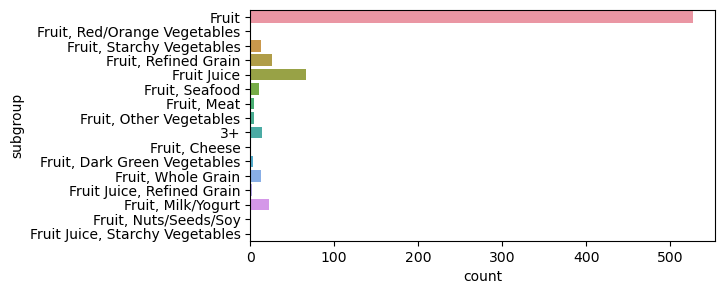

In [ ]:
# Plot: count of each subgroup per food group in the data
fruit_group = nutrition.query("contains_fruit_group == True")
f, ax = plt.subplots(figsize=(6, 3))
sns.countplot(y='subgroup', data=fruit_group)
plt.show()

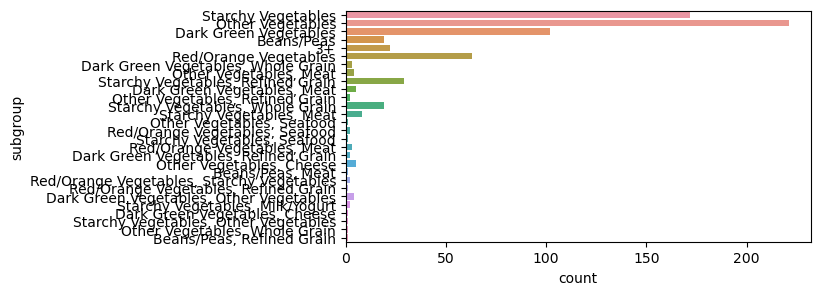

In [ ]:
# Plot: count of each subgroup per food group in the data
vegetable_group = nutrition.query("food_group == 'Vegetable'")
f, ax = plt.subplots(figsize=(6, 3))
sns.countplot(y='subgroup', data=vegetable_group)
plt.show()

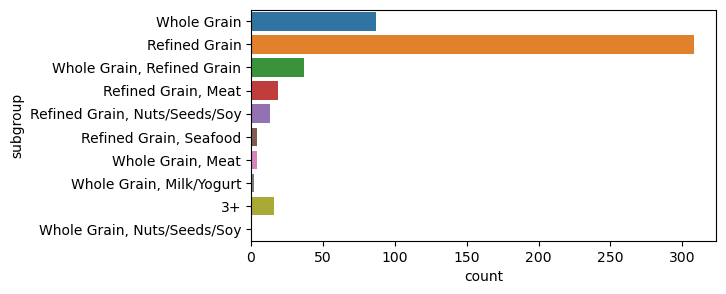

In [ ]:
# Plot: count of each subgroup per food group in the data
grain_group = nutrition.query("food_group == 'Grain'")
f, ax = plt.subplots(figsize=(6, 3))
sns.countplot(y='subgroup', data=grain_group)
plt.show()

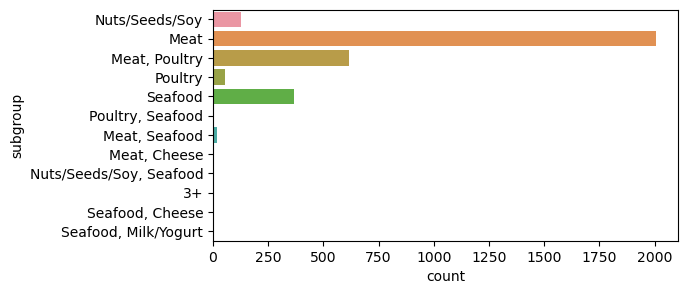

In [ ]:
# Plot: count of each subgroup per food group in the data
protein_group = nutrition.query("food_group == 'Protein'")
f, ax = plt.subplots(figsize=(6, 3))
sns.countplot(y='subgroup', data=protein_group)
plt.show()

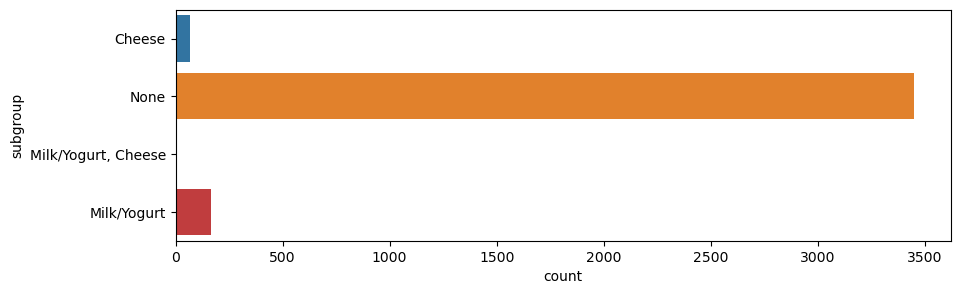

In [ ]:
# Plot: count of each subgroup per food group in the data
dairy_group = nutrition.query("food_group == 'Dairy'")
f, ax = plt.subplots(figsize=(10, 3))
sns.countplot(y='subgroup', data=dairy_group)
plt.show()

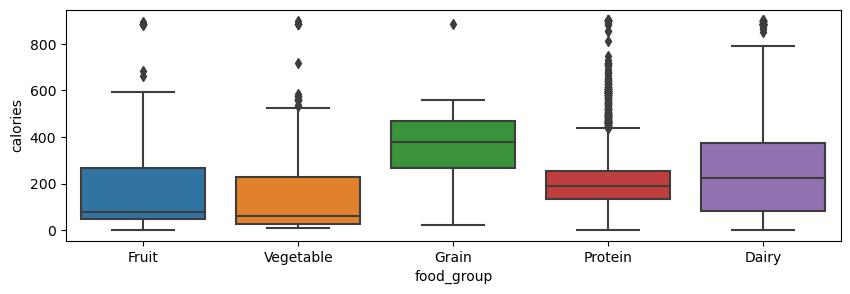

In [ ]:
# Plot: count of each subgroup per food group in the data
f, ax = plt.subplots(figsize=(10, 3))

sns.boxplot(x='food_group', y='calories', order=single_order, data=single_group)
plt.show()

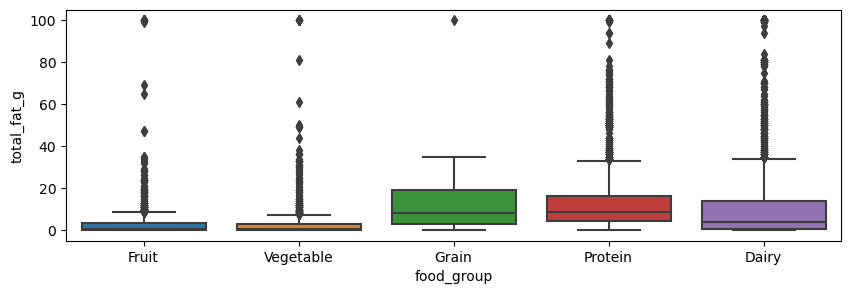

In [ ]:
# Plot: count of each subgroup per food group in the data
f, ax = plt.subplots(figsize=(10, 3))

sns.boxplot(x='food_group', y='total_fat_g', order=single_order, data=single_group)
plt.show()

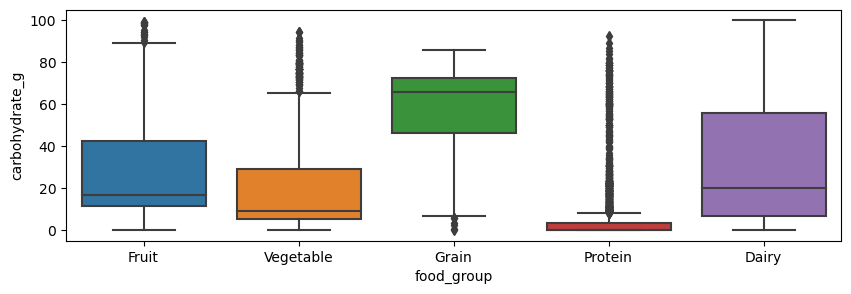

In [ ]:
# Plot: count of each subgroup per food group in the data
f, ax = plt.subplots(figsize=(10, 3))

sns.boxplot(x='food_group', y='carbohydrate_g', order=single_order, data=single_group)
plt.show()

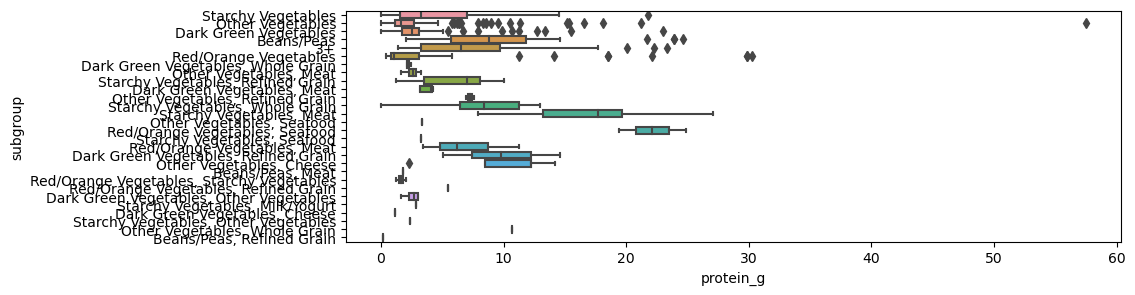

In [ ]:
# Plot: count of each subgroup per food group in the data
f, ax = plt.subplots(figsize=(10, 3))

sns.boxplot(y='subgroup', x='protein_g', data=vegetable_group)
plt.show()

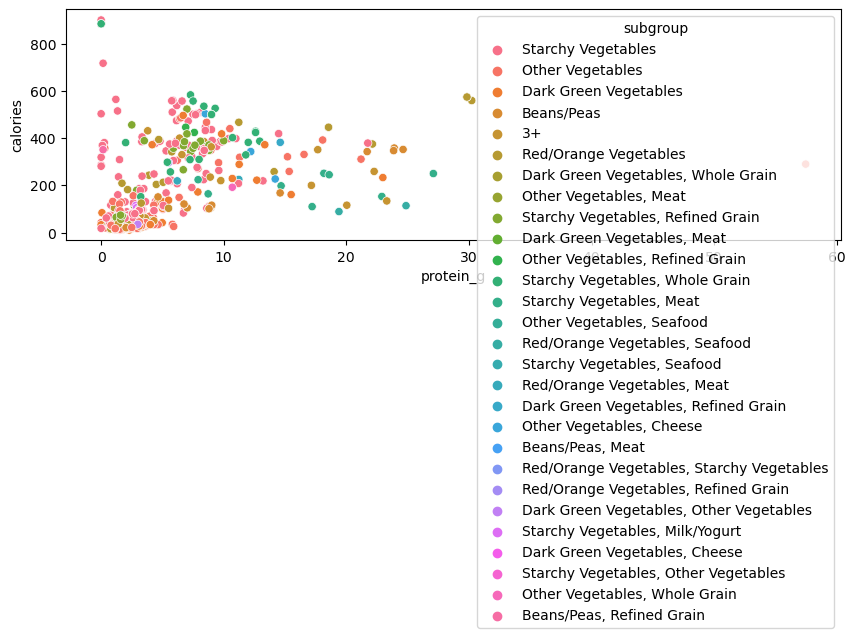

In [ ]:
# Plot: count of each subgroup per food group in the data
f, ax = plt.subplots(figsize=(10, 3))

sns.scatterplot(x='protein_g', y='calories', hue='subgroup', data=vegetable_group)
plt.show()

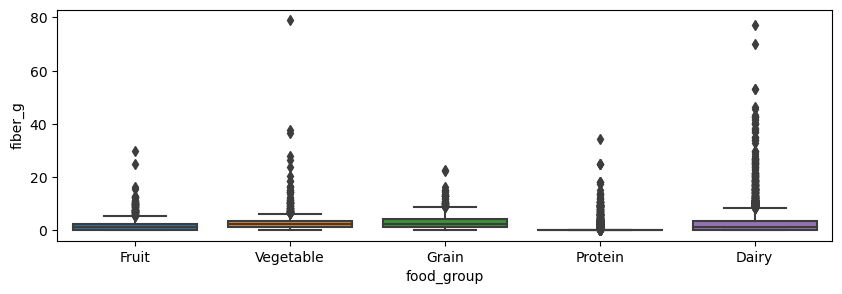

In [ ]:
# Plot: count of each subgroup per food group in the data
f, ax = plt.subplots(figsize=(10, 3))

sns.boxplot(x='food_group', y='fiber_g', order=single_order, data=single_group)
plt.show()

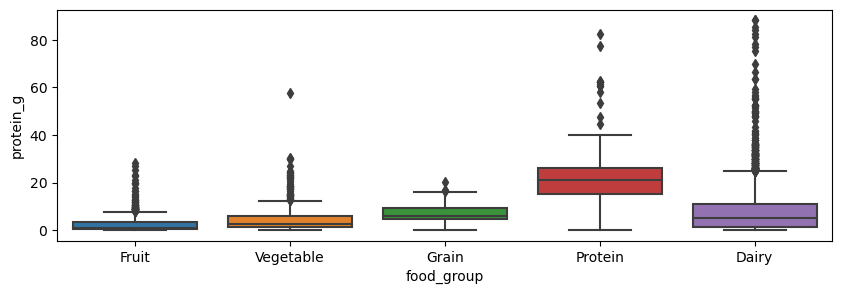

In [ ]:
# Plot: count of each subgroup per food group in the data
f, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(x='food_group', y='protein_g', order=single_order, data=single_group)
plt.show()

## Creating a score system for foods using the Nutrient Rich Foods Index   
*"This NRF algorithm was represented by the sum of the percentage of the daily values of 9 nutrients to encourage (protein, fiber, vitamin A, vitamin C, vitamin E, calcium, iron, magnesium, and potassium) minus the sum of the percentage of the maximum recommended values for 3 nutrients to limit (saturated fat, added sugar, and sodium)."*  
Drewnowski A. The Nutrient Rich Foods Index helps to identify healthy, affordable foods. Am J Clin Nutr. 2010 Apr;91(4):1095S-1101S. doi: 10.3945/ajcn.2010.28450D. Epub 2010 Feb 24. PMID: 20181811.
https://pubmed.ncbi.nlm.nih.gov/20181811/#:~:text=Background%3A%20The%20Nutrient%20Rich%20Foods,are%20both%20nutritious%20and%20affordable.  

(note: recc. daily values vary based on age, sex, lifestyle, pregnancy etc.)

**daily values of 9 nutrients to encourage:**   
1. protein: RDA (recc. daily allowance) for a 154 lb adult = ~56 g/day  
2. fiber: AI (adequate intake) is 25g/day for women, 38g/day for men  
3. vitamin A: RDA is 900mcg RAE (Retinol Activity Equivalents) per day for men, and 700 mcg RAE per day for women  
4. vitamin C: RDA for Vitamin C is 90 mg/day for men and 75 mg/day for women. For smokers, an additional 35 mg per day is recommended   
5. vitamin E: RDA is 15 mg (or 22.4 IU) of alpha-tocopherol per day     
6. calcium: RDA is 1,000 mg/day for adults up to age 50 for men, and up to age 70 for women. 1,200 mg/day for women over 51 and men over 71  
7. iron: RDA is 8 mg/day for men and 18 mg/day for women (ages 19-50), and 8 mg/day for women over 51  
8. magnesium: RDA is 400-420 mg/day for men and 310-320 mg/day for women  
9. potassium: AI is 2,600 mg/day for women and 3,400 mg/day for men  

**daily values of the maximum recommended values for 3 nutrients to limit:**  
1. saturated fat: the Dietary Guidelines for Americans recommend limiting saturated fat to less than 10% of total daily calories. For someone consuming 2,000 calories a day, this would be less than 20 grams of saturated fat per day   
2. added sugar: the Dietary Guidelines for Americans advise limiting added sugars to less than 10% of your daily caloric intake. For a 2,000-calorie diet, this equates to less than 50 grams of added sugars per day. The American Heart Association goes further, recommending no more than 6 teaspoons (25 grams) of added sugar per day for women and 9 teaspoons (38 grams) for men  
3. sodium: the Dietary Guidelines for Americans suggest consuming less than 2,300 milligrams (mg) of sodium per day as part of a healthy eating pattern. The American Heart Association recommends an ideal limit of no more than 1,500 mg per day for most adults, especially for those with high blood pressure  


**calculation of nutrient scores**  
each nutrient amount is divided by its daily recommended value and then by the listed calorie content. this results in the nutrient density. the score for each nutrient amount per 100g is the proportion of it to its daily recommendation (or limit, for negative nutrients).    

1. **(+) protein:**  
protein nutrient score = (*protein_g* / 56g) / *`calories`*  

2. **(+) fiber:**    
fiber nutrient score (average) = (*`fiber_g`*/ 31.5g) / *`calories`*  

3. **(+) vitamin A:**    
vitamin A nutrient score (average) = ((*`vitamin_a_IU`* /0.3)/ 800mcg) / *`calories`*  

4. **(+) vitamin C:**    
vitamin C nutrient score (average, not including smokers) = (*`vitamin_c_mg`* / 82.5mg) / *`calories`*      

5. **(+) vitamin E:**    
vitamin E nutrient score = (*`vitamin_e_mg`* / 15mg) / *calories*  

6. **(+) calcium:**    
calcium nutrient score (average) = (*`calcium_mg`* / 1100mg) / *calories* 

7. **(+) iron:**    
iron nutrient score (average) = (*iron_mg* / 13mg) / *calories*  

8. **(+) magnesium:**    
magnesium nutrient score (average) = (*`magnesium_mg`* / 362.5mg) / *calories*     <- averaged between the given range   

9. **(+) potassium:**  
potassium nutrient score (average) = (*`potassium_mg`* / 3000mg) / *calories* 

1. **(-) saturated fat:**  
saturated fat nutrient score = (*`saturated_fat_g`* / 20g) / *calories*   

2. **(-) added sugar:**  
added sugar nutrient score = (*`sugars_g`* / 20g) / *calories*   
***note: since no data on specifically "added" sugars, we will use the `sugars` column as a rough approximation.  

3. **(-) sodium:**  
sodium nutrient score (recommended) = (*`sodium_mg`* / 2300mg) / *calories* 
sodium nutrient score (ideal) = (*`sodium_mg`* / 1500mg) / *calories* 

b. take the sum of all the positive nutrient scores and the negative scores. Then subtract the negative scores from the positive, resulting in the overall NRF score for each item.  
NRF=∑(positive nutrient scores)−∑(negative nutrient scores)

c. analyze: foods with higher NRF scores are more nutrient-rich and healthy in general.  

** Notes: 
- we will not apply the function to food items which are zero-calorie (there are many drinks/drink mixes like this)
- also we will avoid rows for which saturated fat is NaN because it is so integral to the calculation. this could be altered once those values are filled or deemed to be zero  

simpler indexes:
balanced diet (macronutrients only)

input client intofmration: 
no information -> default, average adult

age

incl


In [ ]:
# define functions to calculate NRF score for each food item 
# NRF algorithm for average adult 
def NRF_score_adult(row):
    calories = row['calories']  # define calories for the food item as one variable
    if (calories > 0) and (row['saturated_fat_g'] == row['saturated_fat_g']):  # apply the function only to rows where we know saturated fat and are >0 calories
        
        # scores for positive nutrients
        protein_score = (row['protein_g']/56)/calories
        fiber_score = (row['fiber_g']/31.5)/calories  
        vitamin_a_score = ((row['vitamin_a_IU']/0.3)/900)/calories  
        vitamin_c_score = (row['vitamin_c_mg']/82.5)/calories
        vitamin_e_score = (row['vitamin_e_mg']/15)/calories
        calcium_score = (row['calcium_mg']/1100)/calories   
        iron_score = (row['irom_mg']/13)/calories            
        magnesium_score = (row['magnesium_mg']/362.5)/calories
        potassium_score = (row['potassium_mg']/3000)/calories

        # scores for negative nutrients
        sat_fat_score = (row['saturated_fat_g']/20)
        sugar_score = (row['sugars_g']/20)
        sodium_score = (row['sodium_mg']/2300)
    
        # calculate totals for positive and negative
        positive_nutrients = protein_score + fiber_score + vitamin_a_score + vitamin_c_score + vitamin_e_score + calcium_score + iron_score + magnesium_score + potassium_score
        negative_nutrients = sat_fat_score + sugar_score + sodium_score

        # the overall NRF score is returned
        return positive_nutrients - negative_nutrients

# ensure all involved columns are numerical
columns_to_convert = ['protein_g', 'fiber_g', 'vitamin_a_IU', 'vitamin_c_mg', 'vitamin_e_mg', 
                      'calcium_mg', 'irom_mg', 'magnesium_mg', 'potassium_mg', 'saturated_fat_g', 'sugars_g', 
                      'sodium_mg', 'calories']
for col in columns_to_convert:
    nutrition[col] = pd.to_numeric(nutrition[col], errors='coerce')

# apply the function using multiple columns as inputs (axis=1), storing results in new columns
nutrition['NRF_score_adult'] = nutrition.apply(NRF_score_adult, axis=1)

The resulting scores are on a scale of -1 to 1, with the more negative values representing less-nutritious foods and positive values representing more-nutritious foods.

To conduct modeling on this data, we can go ahead and standardize the scores using z-score normalization which will ensure they have a mean of zero and standard deviation 1. 

We can also scale the scores to a range of 0 to 10, which will help our client (the nutritionist) explain the meaning of these scores to her clients. to a non-expert, thinking of foods on a scale of 1-10 is much easeir to remember, which can potentially help them evaluate food choices on their own.

In [ ]:
# Scaling scores using z-score normalization (AKA standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # instantiate the standardscaler
# apply the normalization and store result new columns
nutrition['NRF_score_adult'] = scaler.fit_transform(nutrition['NRF_score_adult'].values.reshape(-1, 1))

In [ ]:
# Scaling scores using min-max method 
from sklearn.preprocessing import MinMaxScaler
# instantiate MinMax scaler with range of 0-10 for client interpretability
scaler = MinMaxScaler(feature_range=(0, 10))
# apply the scaling and store results in new columns
nutrition['NRF_score_adult'] = scaler.fit_transform(nutrition['NRF_score_adult'].values.reshape(-1, 1))

below, the distribution of scores across all items in the dataset.  

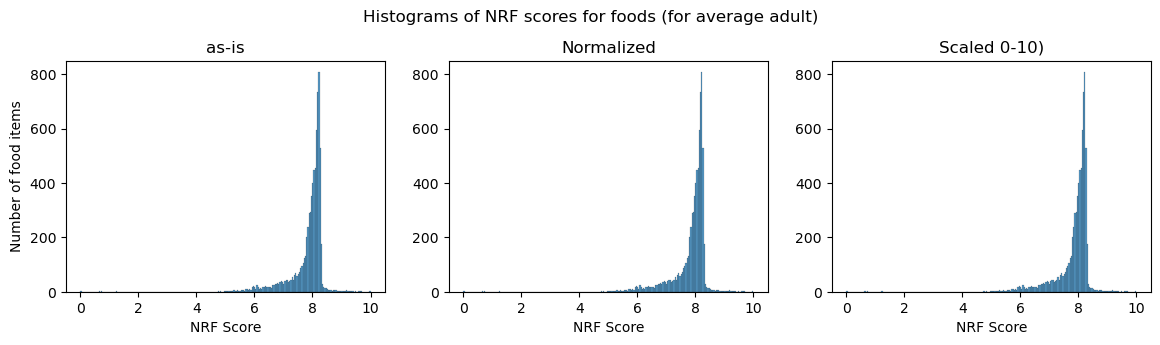

In [ ]:
# Plot: histogram of NRF scores
f, ax = plt.subplots(1, 3, figsize=(14, 3))
sns.histplot(x='NRF_score_adult', ax=ax[0], data=nutrition)  # plot for scores with no normalization or scaling
ax[0].set_title('as-is')
ax[0].set_xlabel('NRF Score')
ax[0].set_ylabel('Number of food items')

sns.histplot(x='NRF_score_adult', ax=ax[1], data=nutrition)  # plot for normalized scores
ax[1].set_title('Normalized')
ax[1].set_xlabel('NRF Score')
ax[1].set_ylabel('')  # remove the y-axis label

sns.histplot(x='NRF_score_adult', ax=ax[2], data=nutrition)  # plot for scaled scores
ax[2].set_title('Scaled 0-10)')
ax[2].set_xlabel('NRF Score')
ax[2].set_ylabel('')  # remove the y-axis label

plt.suptitle('Histograms of NRF scores for foods (for average adult)', y=1.05)  # super title 
plt.show() # show the plot

In [ ]:
nutrition.query("NRF_score_adult == 8.9")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup,variety,Fast Food Chain,NRF_score_adult


## Visualizing the NRF scores for different food types

In [ ]:
pd.reset_option('all')
fruit_group.query("subgroup == 'Fruit, Fruit Juice'")

/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_1136/3737921083.py:1: FutureWarning:

column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.

/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_1136/3737921083.py:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_1136/3737921083.py:1: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_eggs,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup,variety,Fast Food Chain


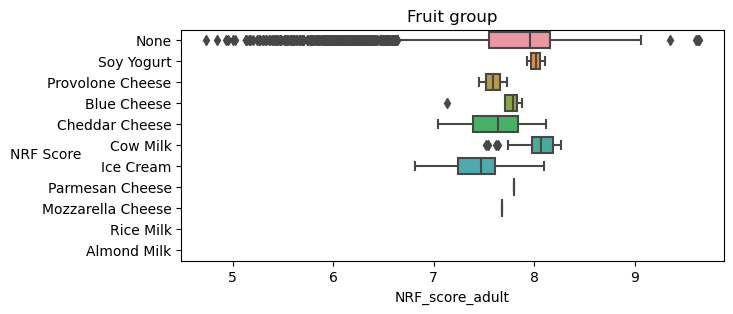

In [ ]:
# Plot: count of each subgroup per food group in the data
milks = nutrition.query("food_group == 'Dairy'")
f, ax = plt.subplots(figsize=(7, 3))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='variety', x='NRF_score_adult', ax=ax, data=milks)
ax.set_title('Fruit group')
ax.set_ylabel('NRF Score', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

In [ ]:
nutrition.query("food_group == 'Dairy'")

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup,variety,Fast Food Chain,NRF_score_adult
8,8,"cheese, camembert",100,300,24.0,15.0,72,842.0,15.4,62.0,...,True,False,True,True,False,Dairy,Cheese,None,None,7.530194
9,9,vegetarian fillets,100,290,18.0,2.8,0,490.0,82.0,102.0,...,True,False,True,False,False,Dairy,None,None,None,8.025055
10,10,"pace, picante sauce",100,25,0.0,0.0,0,781.0,0.0,0.0,...,True,False,True,False,False,Dairy,None,None,None,7.881942
11,11,"goji berries, dried",100,349,0.4,NaN,0,298.0,0.0,0.0,...,True,False,True,False,False,Dairy,None,None,None,NaN
13,13,"crackers, rusk toast",100,407,7.2,1.4,78,253.0,0.0,87.0,...,True,False,True,False,False,Dairy,None,None,None,8.166212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,8767,"toddler formula, ready-to-feed, enfagrow premi...",100,64,3.6,1.6,1,25.0,8.0,11.0,...,True,False,True,False,False,Dairy,Milk/Yogurt,None,None,7.996141
8770,8770,"infant formula, with ara and dha, sensitive (l...",100,68,3.7,2.4,2,21.0,11.1,10.0,...,True,False,True,False,False,Dairy,Milk/Yogurt,None,None,7.961767
8771,8771,"infant formula, not reconstituted, liquid conc...",100,128,6.5,2.8,0,46.0,15.7,20.0,...,True,False,True,False,False,Dairy,Milk/Yogurt,None,None,7.813944
8772,8772,"pan dulce, contains wheat flour and rice flour...",100,445,16.0,NaN,0,0.0,0.0,0.0,...,True,False,True,False,False,Dairy,None,None,None,NaN


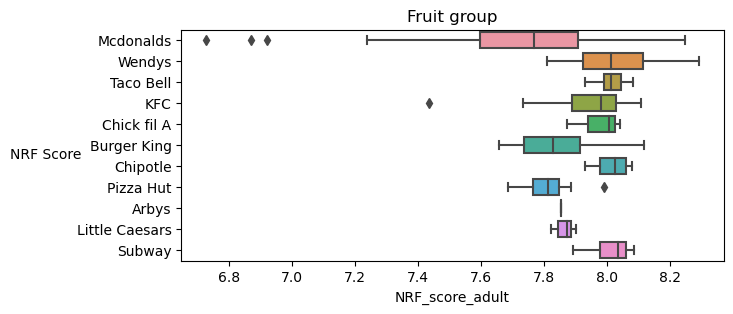

In [ ]:
# Plot: count of each subgroup per food group in the data
fast_food = nutrition.query("`fast food?` == True")
f, ax = plt.subplots(figsize=(7, 3))
f.subplots_adjust(wspace=0.1)
sns.boxplot(y='Fast Food Chain', x='NRF_score_adult', ax=ax, data=fast_food)
ax.set_title('Fruit group')
ax.set_ylabel('NRF Score', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

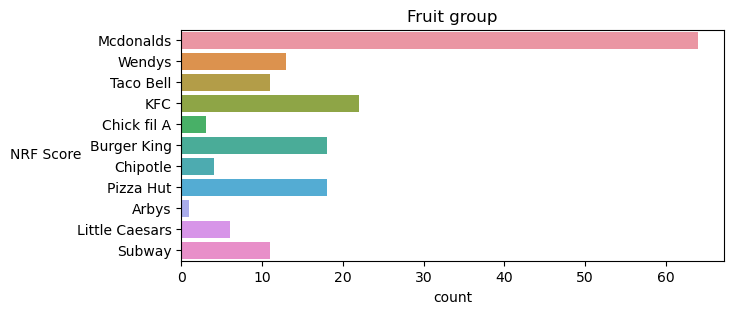

In [ ]:
# Plot: count of each subgroup per food group in the data
fast_food = nutrition.query("`fast food?` == True")
f, ax = plt.subplots(figsize=(7, 3))
f.subplots_adjust(wspace=0.1)
sns.countplot(y='Fast Food Chain', ax=ax, data=fast_food)
ax.set_title('Fruit group')
ax.set_ylabel('NRF Score', rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.25,0.43)  # Adjust y-axis label position
plt.show() 

mcdonalds: 64
wendys: 13


In [ ]:
nutrition.query("`Fast Food Chain` == 'In-n-Out'")  


,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_dairy_group,contains_milk,contains_yogurt,contains_cheese,fast food?,food_group,subgroup,variety,Fast Food Chain,NRF_score_adult


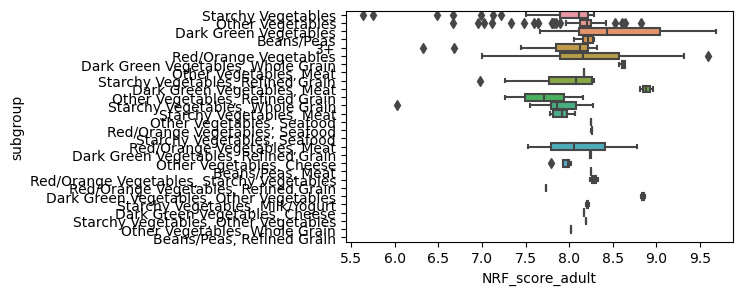

In [ ]:
# Plot: 
vegetable_group = nutrition.query("food_group == 'Vegetable'")
f, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(x='NRF_score_adult', y='subgroup', ax=ax, data=vegetable_group)
#ax.set_ylabel('')        # remove y-axis label
#ax.set_yticklabels([])   # remove y-axis tick labels 

plt.show()

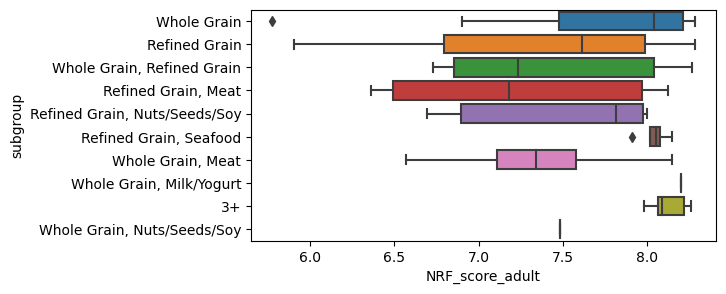

In [ ]:
# Plot: count of each subgroup per food group in the data
grain_group = nutrition.query("food_group == 'Grain'")
f, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='NRF_score_adult', y='subgroup', data=grain_group)
plt.show()

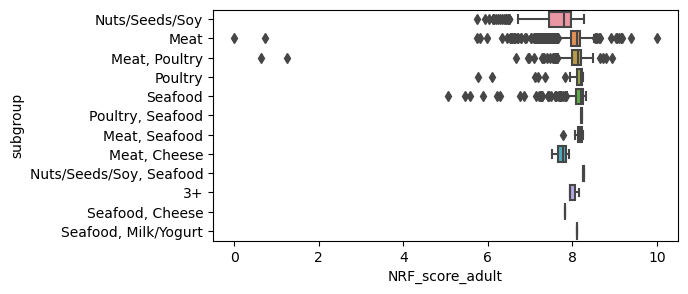

In [ ]:
# Plot: count of each subgroup per food group in the data
protein_group = nutrition.query("food_group == 'Protein'")
f, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='NRF_score_adult', y='subgroup', data=protein_group)
plt.show()

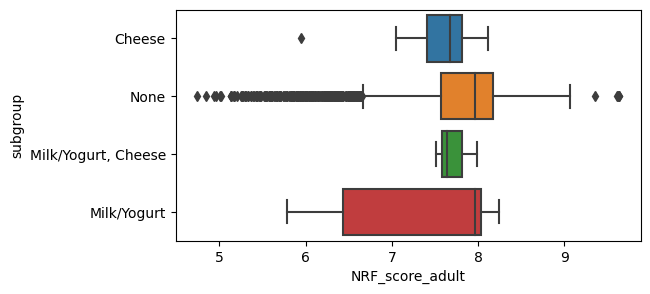

In [ ]:
# Plot: count of each subgroup per food group in the data
dairy_group = nutrition.query("food_group == 'Dairy'")
f, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='NRF_score_adult', y='subgroup', data=dairy_group)
plt.show()

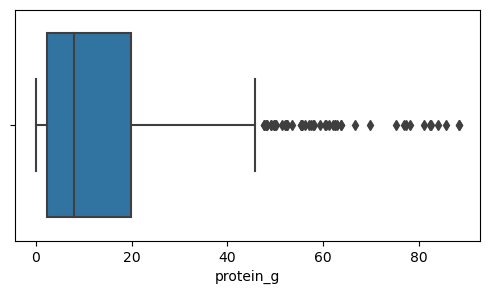

In [ ]:
# Plot: count of each subgroup per food group in the data
dairy_group = nutrition.query("food_group == 'Dairy'")
f, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='protein_g', data=nutrition)
plt.show()

## Modeling the caloric impact of different macronutrients
a large chunk of clients seeking nutritional advice do so for weight-loss goals.  
In addition to exploring nutrient density by mass, different macronutrients can be examined for their unique contribution to overall food item calorie content. 
To examine the effect of different macronutrients on 

below--for exporting the cleaned data as needed

In [ ]:
#nutrition.to_csv('nutrition_cleaner.csv', index=False)

In [ ]:
#nutrition_cleaner = pd.read_csv('nutrition_cleaner.csv')
#nutrition_cleaner.head()

In [ ]:
#nutrition_cleaner.drop(columns=['contains_fruit_group', 'contains_fruit', 'contains_fruit_juice', 'contains_vegetable_group', 'contains_dark_green_vegetables', 'contains_red_orange_vegetables', 'contains_beans_peas', 'contains_starchy_vegetables', 'contains_other_vegetables', 'contains_grain_group', 'contains_whole_grain', 'contains_refined_grain', 'contains_protein_group', 'contains_meat_poultry_eggs', 'contains_seafood', 'contains_nuts_seeds_soy', 'contains_dairy_group', 'contains_milk_yogurt', 'contains_cheese'], inplace=True)
#nutrition_cleaner.head()

In [ ]:
#nutrition_cleaner.to_csv('nutrition_cleanest.csv', index=False)